In [1]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# A text analysis for comments of video channels

## Exploratory analysis for general information
### Time seires 
#### Year trend with video count
#### Year trend with video views
### Prevalence: what are the most viewed channels
### Persistence: what are the most active channels
### Words frequency and Word cloud
## Topic Modeling - LDA
### Video Level
#### Top 5 models in video level
#### Classify evevry video into 5 topics 
#### Compare video-level perforemance with each topic
### Channel Level
#### Top 5 models
#### Classify evevry channel into 5 topics 
#### Compare channel-level perforemance with each topic
### Optimize the model - Choosing Optimal LDA Model
## Sentiment Analysis
### Sentiment analysis with SnowNLP
#### Predict comments sentiment in video - level
#### Predict comments sentiment in channel - level
#### Correlaion analysis between sentiment and views in video - level
#### Correlaion analysis between sentiment and views in video - level
### Sentiment analysis with Model training: RNN-Embedding-BiLSTM-LSTM
### Compare performance with SnowNLP and LSTM
## Insights and recommendations
## Next step

In [242]:
import re
import nltk
import jieba
import string
import opencc
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from pyecharts import Pie
import matplotlib.pyplot as plt
from scipy.misc import imread 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS

In [3]:
df1 = pd.read_excel('csrp data science challenge.xlsx', index_col=0,sheet_name=0)

In [4]:
df2 = pd.read_excel('csrp data science challenge.xlsx', index_col=0,sheet_name=1)

In [5]:
df1 = df1.reset_index()

In [6]:
df1.head()

commentText           updatedAt      videoId
0  ‰∏ÄÂè£Â∞±ÂêÉÊéâ‰∏ÄÂçÉÂÖÉÔºåÔºåËøôË∞ÅÂêÉÁöÑËµ∑Âïä 2016-02-17 18:26:21  UvWOfjiXQiU
1               ÊàëË©¶Ë©¶ 2016-12-22 21:33:05  w_VJAynyxAw
2           Âéü‰æÜ‰Ω†Ë∑üÊàë‰∏ÄÊ®£ 2016-02-24 00:55:01  DxforOx--9Q
3         ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù• 2016-02-06 10:25:05  -foZ5RcCm8U
4    Ëøô‰∏™ÂäõÂ∫¶ÔºåÊ≤âÂáùÂÜÖÊïõÔºåÊòØÁúüÂäüÂ§´ 2016-12-18 15:29:14  _IbK0X3Qi3I

In [7]:
df1['videoId'].value_counts()

-foZ5RcCm8U    91
qoRdsyxZJzg    38
-S8V29TvZ7Y    34
JAHh85Qgv88    32
pTrELxQ3dbw    31
1hdkpGi3oPo    26
8uhvP8ryU1I    23
2Ftfz3OeBP0    19
gHOHfolpmV8    19
Ir_sbO4x6i0    18
2bMiVjjrKOI    18
whqGyTPyFrU    18
9xQ_7HQkee0    17
GHqXCf2ej_g    17
x1meOvD9fAc    17
tx1c8QRlaHk    17
FAz5ScuHhJs    17
2wEpPCtiZ8M    17
u2oP2VWZOy0    16
N2AxoCM9ZaI    15
wvnAFrvr3xc    15
nkKLZTomkhU    15
0kDwDSJRNOQ    15
GDhBVvd1rlE    15
LhZxDtm_MTo    15
6nzITiOJhgs    15
ccIOL4ViA5U    14
gFyjBokezNU    14
U8ItusnFzIU    14
qX7poSHqsWk    14
               ..
Jzs0i9gbtF8     1
PB4aDgdXs9g     1
7-zUGSDpoxk     1
9xIRFttBALc     1
QTvU56_J2hw     1
PYX-wCbTI4M     1
YRt_0Ltee4g     1
IglEs5S0XJk     1
Hlwqe6exBuw     1
pq0SGtD1Hk0     1
dqMSLEetp7g     1
z6GLoPPDD7o     1
pqDAa53FQU8     1
iSH6JkaATF4     1
3y6KHRipafQ     1
VMlgBCEZNmY     1
X7xWw0RxJgg     1
MEu6LJDfiWw     1
W8vTAgXsjZA     1
cFozQF0sW2I     1
6qkwKkVUU8s     1
bArq62lvnVg     1
biNFXRMnWKE     1
FqTWqJaGaZI     1
vQpOWNYAsg

In [8]:
df2 = df2.reset_index()

In [9]:
df2.head()

channelTitle         publishedAt                              title  \
0  ÊôÇÁ©∫ÂíñÂï°È§® timecoolfree 2016-04-01 00:03:18                   Ê†ºÁæÖËå≤Â∞º Á¨¨‰∏âÂçÅÂÖ¨Èáå:„ÄåËá™ÊÆ∫„ÄçA   
1  ÊôÇÁ©∫ÂíñÂï°È§® timecoolfree 2016-04-01 00:03:17                   Ê†ºÁæÖËå≤Â∞º Á¨¨‰∏âÂçÅÂÖ¨Èáå:„ÄåËá™ÊÆ∫„ÄçD   
2              Ë≠∑Áî∞„Äâ:3) 2012-01-28 14:34:10                 Ëá™ÊÆ∫Èü≥Ê®ÇÂäá (‰∏≠ÊñáÂ≠óÂπï by Ë≠∑Áî∞)   
3           Êù±Ê£ÆÊñ∞ËÅû CH51 2016-04-21 16:19:02               ÊúÄÊñ∞„ÄãÂ•≥‰∏≠Â∞âÂ©öÂâçÁñëËá™ÊÆ∫ ÂÆ∂Â±¨ÊÇ≤ÁóõËµ¥ÊÆØÂÑÄÈ§®   
4                  È¢®ÁèÄ 2016-09-30 16:32:53  [minecraft] 30Á®Æ‰ΩúÊ≠ªÁöÑÊñπÂºè EP1 ÊÉ≥Ê≠ª‰πüÊ≤íÈÇ£È∫ºÂÆπÊòì   

       videoId  viewCount  
0  YKTfi7pZw-s    33065.0  
1  hS2PScKwneA    15126.0  
2  FanBTishaug    50504.0  
3  wBegQdyxDwc     2929.0  
4  91K-fvRju1E     5893.0

## Exploratory analysis for general information

### Time series

In [10]:
df2

channelTitle         publishedAt  \
0                              ÊôÇÁ©∫ÂíñÂï°È§® timecoolfree 2016-04-01 00:03:18   
1                              ÊôÇÁ©∫ÂíñÂï°È§® timecoolfree 2016-04-01 00:03:17   
2                                          Ë≠∑Áî∞„Äâ:3) 2012-01-28 14:34:10   
3                                       Êù±Ê£ÆÊñ∞ËÅû CH51 2016-04-21 16:19:02   
4                                              È¢®ÁèÄ 2016-09-30 16:32:53   
5                                        ÂΩ±Â≠êShadow 2016-07-25 13:13:15   
6                           God Tone Asia ÂºµÂÆ∂ÂÖÑÂºüÊªëËµ∑‰æÜ 2016-06-07 00:33:03   
7                                         zass 17 2015-05-07 21:36:32   
8                                     TomoNews Âè∞ÁÅ£ 2012-04-21 04:07:31   
9                                    Killer Steal 2016-12-27 06:37:32   
10                                             Ë†¢Ë†¢ 2015-12-15 19:16:21   
11                                      Garson ÂòâÁ•û 2016-07-18 12:00:30   
12                            „ÄêËµ∑Â∞èÁÇπÂÆòÊñπÈ¢ëÈÅì„Äë Ê≠£ÁâàÊéàÊùÉ Ê¨¢ËøéËÆ¢ÈòÖ 2016-09-08 11:10:41   
13                            „ÄêËµ∑Â∞èÁÇπÂÆòÊñπÈ¢ëÈÅì„Äë Ê≠£ÁâàÊéàÊùÉ Ê¨¢ËøéËÆ¢ÈòÖ 2016-11-17 10:47:40   
14                            „ÄêËµ∑Â∞èÁÇπÂÆòÊñπÈ¢ëÈÅì„Äë Ê≠£ÁâàÊéàÊùÉ Ê¨¢ËøéËÆ¢ÈòÖ 2016-07-28 10:47:51   
15                                          ‰∏≠ÊôÇÈõªÂ≠êÂ†± 2009-08-03 10:21:24   
16                                       mike liu 2016-11-06 23:57:17   
17                                      SETN‰∏âÁ´ãÊñ∞ËÅûÁ∂≤ 2016-10-28 12:10:20   
18                                      Êù±Ê£ÆÊñ∞ËÅû CH51 2016-12-16 20:13:39   
19                                      Tat Story 2016-07-08 20:47:27   
20                           ËòãÊûúÂãïÊñ∞ËÅû HK Apple Daily 2016-08-29 21:41:37   
21                           ËòãÊûúÂãïÊñ∞ËÅû HK Apple Daily 2016-10-09 21:32:33   
22                                 gourment888777 2015-06-04 01:13:30   
23                          Kwong Wah Yit PohÂÖâËèØÊó•Â†± 2016-05-10 12:12:36   
24                                     NTDCHINESE 2016-08-24 18:05:52   
25                                     Archperson 2016-04-22 14:09:39   
26                                    ËèØÁ¥çÂÖÑÂºüÂè∞ÁÅ£Á≤âÁµ≤‰ø±Ê®ÇÈÉ® 2016-01-20 11:24:37   
27                              POPCORN Movies TW 2016-02-01 08:23:39   
28                                     TWITAI-ÊÑõÊóÖË™å 2015-07-14 10:16:16   
29                                 helpforsuicide 2013-02-04 16:39:04   
...                                           ...                 ...   
3516                                    icion2000 2016-07-17 11:39:09   
3517  NSR Chinese - New Southern Records Malaysia 2016-07-14 15:38:56   
3518                                        ËëâSuJi 2015-03-23 00:18:00   
3519               Thesunflowermovement Channel 2 2016-06-20 00:18:22   
3520                                      ÁæéÂõΩ‰πãÈü≥‰∏≠ÊñáÁΩë 2016-11-19 13:17:21   
3521                                     HZTVËèØËóèË°õË¶ñ 2016-05-17 14:48:01   
3522                                     HZTVËèØËóèË°õË¶ñ 2016-03-08 21:12:21   
3523                                   ÁæÖÂãí‰ΩêÈÖ•ËÑÜÂ∏∂È™®ÈõûËÉ∏ËÇâ 2014-12-18 18:34:08   
3524                                      ËàûÁßãÈ¢®Áõ¥Êí≠È†ªÈÅì 2016-03-22 01:04:02   
3525                                     MrKmtong 2016-06-23 16:47:14   
3526                                     MrKmtong 2016-06-30 17:20:49   
3527                                    Pin Apple 2016-01-01 00:36:26   
3528                                         ÂøÉÈùàÊôÇÁ©∫ 2015-05-11 12:06:53   
3529                                  ANXGameplay 2016-06-22 17:43:47   
3530                         Crayon shin chanË†üÁ≠ÜÂ∞èÊñ∞ 2016-08-15 18:16:34   
3531                                     shop1351 2008-05-20 15:29:45   
3532                             Vamos SportsÁøäËµ∑ÈÅãÂãï 2016-05-14 18:16:25   
3533                             Vamos SportsÁøäËµ∑ÈÅãÂãï 2016-08-07 12:17:38   
3534                               

In [11]:
df2['video_count'] = 1

In [12]:
df_t1 = df2.set_index('publishedAt').resample('1y').aggregate({'video_count':'sum'}).reset_index()
df_t1

publishedAt  video_count
0   2006-12-31           10
1   2007-12-31           14
2   2008-12-31           26
3   2009-12-31           58
4   2010-12-31           78
5   2011-12-31          149
6   2012-12-31          172
7   2013-12-31          271
8   2014-12-31          375
9   2015-12-31          533
10  2016-12-31         1859

In [13]:
from pyecharts import Line

attr = df_t1['publishedAt']
value = df_t1['video_count']
line = Line()
line.add(
    "Year trend with the video count",
    [str(y)[:10] for y in attr],
    value,
    mark_point=["max", "min"],
    mark_line=["average"],
)
line.render('Year trend with video count.html')

#### Year trend with video count

We can see that the videos in ceah year in the dataset are increasing and most of them are from 2016

In [14]:
from IPython.display import IFrame
IFrame('Year trend with video count.html',800,400)

In [15]:
df_t2 = df2.set_index('publishedAt').resample('1y').aggregate({'viewCount':'sum'}).reset_index()
df_t2

publishedAt    viewCount
0   2006-12-31    9196191.0
1   2007-12-31   10783061.0
2   2008-12-31    7530550.0
3   2009-12-31   13452802.0
4   2010-12-31   13666077.0
5   2011-12-31   24447190.0
6   2012-12-31   29017882.0
7   2013-12-31   29492452.0
8   2014-12-31   41990180.0
9   2015-12-31   41348363.0
10  2016-12-31  140772175.0

#### Year trend with video views

From this chart, we can see that the whole views are keeping the similar incresing pace with the video numbers, which may be a sign that people are watching more and more videos

In [16]:
attr = df_t2['publishedAt']
value = df_t2['viewCount']
line = Line()
line.add(
    "Year trend with video views",
    [str(y)[:10] for y in attr],
    value,
    mark_point=["max", "min"],
    mark_line=["average"],
)
line.render('Year trend with video views.html')
IFrame('Year trend with video views.html',800,400)

### what are the most viewed channels
I filter out the top 20 viewed channels, and found out that most of channels has less than 5 videos, which means that the most viewed channel are not winning by the quantity but others, like content itself.

In [17]:
df3 = df2.pivot_table(index=['channelTitle'],values='viewCount',aggfunc='sum').reset_index()
df3 = df3.sort_values(by='viewCount',ascending=False)[:20]
df3

channelTitle   viewCount
87                  Blippi  67869205.0
1366       Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music  17358848.0
36                  ACfeel   7851112.0
1487                  Áü≥Ê∂õTV   7778571.0
727            cosbystudio   6003258.0
960              summerfl7   4909182.0
1134                   ÂäâÁÄöÊñá   4127160.0
944               shichwan   3855478.0
786   hmvDigitalChinaGroup   3782191.0
536               Sk Chung   3327336.0
1656                  ÈóúÈçµÊôÇÂàª   3033815.0
70               Apple Jai   2936346.0
870           memehongkong   2782070.0
863               mandy_hm   2693611.0
1485              ÁúüÁöÑÂÅáÁöÑÁúüÁöÑÂÅáÁöÑ   2458904.0
1704                    ÈüìÊÅ©   2449368.0
54          Airwaves Á≤æÁ•ûÂï¶Âï¶Èöä   2355594.0
1087                 ‰∏≠ÊôÇÈõªÂ≠êÂ†±   2179411.0
917            q0921041140   1993494.0
637                 WhyWhy   1929411.0

In [18]:
from pyecharts import Bar

attr = df3['channelTitle']
v = df3['viewCount']
bar = Bar("Most viewed channels")
bar.add("Most viewed channels", attr, v,is_label_show=False)
bar.render('Most viewed channels.html')

In [19]:
IFrame('Most viewed channels.html',800,420)
#you can click on table or labels

In [20]:
df4 = df2.sort_values(by='viewCount',ascending=False)[:10]
df4

channelTitle         publishedAt  \
3296                Blippi 2016-05-22 16:30:24   
419        Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2012-09-14 17:49:08   
313                 ACfeel 2007-03-23 13:24:51   
1530           cosbystudio 2006-05-13 13:23:41   
1121             summerfl7 2015-02-02 20:31:28   
183                    ÂäâÁÄöÊñá 2014-09-13 21:05:45   
330        Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2010-09-10 18:08:00   
957               Sk Chung 2014-12-27 16:40:50   
987   hmvDigitalChinaGroup 2015-11-07 04:20:45   
1980             Apple Jai 2014-06-20 21:33:54   

                                                  title      videoId  \
3296  Learn The Alphabet With Blippi | ABC Letter Boxes  67JzSRnyXr4   
419   Âë®Êù∞ÂÄ´„ÄêÈæçÊç≤È¢® ÂÆòÊñπÂÆåÊï¥MV„ÄëJay Chou "Tornado" MV (Long-Jua...  RPWDeLqsN0g   
313                                        Áü≠Áü≠50Áßí,Á´üÂ¶ÇÊ≠§ÊÑü‰∫∫!  dTn2iurL2cE   
1530                                                ËÅΩ Êµ∑  ooqDc0Ig174   
1121                       ÁâΩÁµ≤Êà≤ by ÈäÄËá® & AkiÈòøÊù∞ QIAN SI XI  C6YobfNjeqc   
183                              ÈÖíÁü∏ÂÄòË≥£ÁÑ°ÔºöÈÄôÈ¶ñÊ≠å‰æÜËá™Êñº‰∏ÄÂÄãÊÉÖÁØÄÁöÑÊÑü‰∫∫ÊïÖ‰∫ãÔºö  AAWfPJXYoTo   
330       Âë®Êù∞ÂÄ´ Jay Chou„ÄêÈõ®‰∏ã‰∏ÄÊï¥Êôö Rain All Night„ÄëOfficial MV  jOxzAsnx9-0   
957                                           Êñ∞È¶¨Â∏´Êõæ Á≤µÊõ≤‰∏≤Ááí  jXuc90xKqIg   
987                           „ÄäÂçÅÊúàÂàù‰∫îÁöÑÊúàÂÖâ„ÄãÈõªÂΩ±ÁâàMV - ÂºµÊô∫Èúñ„ÄäÁ•ùÂêõÂ•Ω„Äã  k_NcPR-8BF0   
1980                                          Ë≤∑Èõ™Á≥ïÊôÇ‰∏çË¶ÅÂàÜÂøÉ„ÄÇ  hopIeKMYtV8   

       viewCount  video_count  
3296  67869205.0            1  
419   13873838.0            1  
313    7851112.0            1  
1530   6003258.0            1  
1121   4909182.0            1  
183    4127160.0            1  
330    3485010.0            1  
957    3327336.0            1  
987    3044537.0            1  
1980   2838388.0            1

In [21]:
df5 = df2.pivot_table(index=['channelTitle'],values='videoId',aggfunc='count').reset_index()
df5 = df5.sort_values(by='videoId',ascending=False)[:20]
df5

channelTitle  videoId
1487                                               Áü≥Ê∂õTV      219
1590                               ËòãÊûúÂãïÊñ∞ËÅû HK Apple Daily       95
1656                                               ÈóúÈçµÊôÇÂàª       71
870                                        memehongkong       68
1368                                          Êù±Ê£ÆÊñ∞ËÅû CH51       59
1078  ‰∏≠ÂõΩÊ±üË•øÁΩëÁªúÂπøÊí≠ÁîµËßÜÂè∞ China Jiangxi Radio and Television...       37
567                                           TVBS NEWS       31
1156                                             Âè∞ÁÅ£ËòãÊûúÊó•Â†±       25
1256                                               ÂπªÁáÑÁâôÊúà       24
1087                                              ‰∏≠ÊôÇÈõªÂ≠êÂ†±       24
1506                                                 Á±ΩÂ≤∑       20
1413                                             Ê∞ëË¶ñÁ∂úÂêàÈ†ªÈÅì       20
1064                                           ‰∏âÁ´ãLIVEÊñ∞ËÅû       20
180                                    FOURum Hong Kong       19
1701                 Èùû‰Ω†Ëé´Â±ûÂÆòÊñπÈ¢ëÈÅì Only You Official Channel       19
1084                                               ‰∏≠Â§©ÈõªË¶ñ       19
1379                                                ÊûóÂª∑Êù∞       18
1739                                            È∫•Âç°Ë≤ùÈÅäÊà≤È†ªÈÅì       18
597                      Thesunflowermovement Channel 2       18
1091                                               ‰∏≠Ë¶ñÊñ∞ËÅû       17

In [22]:
dft = df2.pivot_table(index=['channelTitle'],values='videoId',aggfunc='count').reset_index().sort_values(by='videoId',ascending=False)

In [23]:
dft[dft['channelTitle'] == 'Sk Chung']

channelTitle  videoId
536     Sk Chung        1

### what are the most active channels
The most active channels are basically all from news or news reviews channel, even though they process a lot of videos, but only theree of them make to the list of top viewed channels 

In [24]:
attr = df5['channelTitle']
v = df5['videoId']
pie = Pie()
pie.add("channel layout", attr, v, is_label_show=False,center = [70,60],legend_orient="vertical",legend_pos="left")
pie.render('channel layout.html')

In [25]:
IFrame('channel layout.html',800,420)
#you can click on table or labels

### Words frequency and word cloud

#### Merge two table into one

In [26]:
df = pd.merge(df1,df2,on=['videoId'],how='left')

This is how this dataset like

In [27]:
df.head()

commentText           updatedAt      videoId   channelTitle  \
0  ‰∏ÄÂè£Â∞±ÂêÉÊéâ‰∏ÄÂçÉÂÖÉÔºåÔºåËøôË∞ÅÂêÉÁöÑËµ∑Âïä 2016-02-17 18:26:21  UvWOfjiXQiU    NeoKing5168   
1               ÊàëË©¶Ë©¶ 2016-12-22 21:33:05  w_VJAynyxAw            ÂæêËÅñÂÇë   
2           Âéü‰æÜ‰Ω†Ë∑üÊàë‰∏ÄÊ®£ 2016-02-24 00:55:01  DxforOx--9Q   Pumpkin Jenn   
3         ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù• 2016-02-06 10:25:05  -foZ5RcCm8U  China History   
4    Ëøô‰∏™ÂäõÂ∫¶ÔºåÊ≤âÂáùÂÜÖÊïõÔºåÊòØÁúüÂäüÂ§´ 2016-12-18 15:29:14  _IbK0X3Qi3I          zxmsf   

          publishedAt                                     title  viewCount  \
0 2010-09-26 01:07:19                        ÈùûÂá°Â§ßÊé¢Á¥¢_ÁæéÈ£üÂ§ßÂ≠∏Â†Ç_ÈÆëÈ≠öÊïôÁà∂ÈõôÈõÑ    23272.0   
1 2010-10-18 18:03:18                                  ËèúÈ≥•ÊåëÊà∞ÊØíÊ∞£ÂÆ§2      438.0   
2 2015-04-12 20:35:23  üéÉ ÂåÖÂåÖÂ§ßËß£ÊãÜ What's in My Bag | Pumpkin JennüéÉ   182411.0   
3 2015-02-02 00:56:04          ‰∏≠ÂõΩÂéÜÂè≤Âú∞Âõæ Historical Atlas of China   995311.0   
4 2009-03-18 19:39:57                                  ‰π¶ÂùõËÄÜÂÆø-ËÉ°ÈìÅÁîü     1634.0   

   video_count  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [28]:
df=df.sort_values(['viewCount','publishedAt'],ascending=[False,False])
df

commentText           updatedAt  \
6914                                               ÊàëÂÄëË¶ÅÊ±Ç 2016-06-06 23:19:13   
683                                Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑ 2016-04-24 13:34:55   
1084                            ÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñ 2016-01-23 11:19:52   
1285                                       Âà•ÊääÂ§ßÂÆ∂Áï∂ÁôΩÁô°  Âë®Á•ûÂÅ∑ 2016-04-23 03:22:00   
1448                                          Ë¢´Êç≤Âà∞ÁÅ´ÊòüÈÇÑÊòØË¶ÅËÅΩ 2016-04-27 07:14:09   
2431                                     ÈæçÊç≤È¢® ÈÇ£Â§©ÊòØÊàëÁîüÊó•Âî∑ Âë®Ëë£ 2016-04-23 03:20:28   
2532                                     Áà±ÊÉÖÊù•ÂæóÂ§™Âø´ÊòØ‰∏çÊòØÂèëÁöÑÈ°∫‰∏∞Ôºü 2016-06-17 06:56:05   
2737                                          ‰∏ÄËæàÂ≠êÊ≤°ËßÅËøáÈæôÂç∑È£é 2016-05-14 13:05:16   
3723                                           ÈÄôÊõ≤ÊáâË©≤ÊòØËã±ÊñáÊ≠å 2016-04-23 03:14:36   
4850                                           Á∂ìÂÖ∏ÁöÑÁ¨¨‰∏ÄÂºµÂ∞àËºØ 2016-01-18 20:34:23   
5292                                      ÂêéÁü•ÂêéËßâ ÊâçÁü•ÈÅì‰Ω†Á¶ªÂºÄ‰∏ÄÂπ¥ 2016-03-24 20:16:25   
6821                                  ËÄÅËÖäËÇâÂ≠¶ÂßêÊ∑±ÊÉÖÁøªÂî±Âë®Êù∞‰º¶„ÄäÈæôÂç∑È£é„Äã 2016-02-23 22:07:02   
1528                                           Â•Ω‰πñÂ∑ßÁöÑÂ≠©Â≠êÂñîÔºÅ 2016-10-19 23:56:04   
513                                             ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØû 2016-04-14 17:57:47   
1574                    Âú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇ 2016-03-02 12:16:51   
2664                                     Â•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúüÁöÑÂ§™Â•ΩÂê¨‰∫Ü„ÄÇ 2016-03-24 02:51:44   
5348                                         ÈÄôÂ•≥Ê≠åÊâãËºÉÁîöÈ∫ºÂêçÂ≠ó? 2016-01-17 14:58:39   
1499  ËÉåÊôØÊïÖ‰∫ãËØëÊñáÔºàÊù•Ëá™ÁôæÂ∫¶ÔºâÔºö<br />ËØëÊñá:„ÄÄÊàëÂ∞èÊó∂ÂÄôËÉΩÁúãËßÅÈ¨ºÔºå‰∏Ä‰∏™Èõ™Â§úÈáåÂú®‰∏ÄÂ∫ßËçíÂØ∫ÈáåÈÅáËßÅ‰∏Ä... 2016-07-05 04:01:06   
3666                                        ÊÑüÊÅ©È°òÊâÄÂèãÂ•ΩÈÉΩÁ¶èÊÖßÂπ≥ÂÆâ 2016-11-29 17:48:43   
3691                                             Â•≥‰∏ªËßíÂÉèÊòÜÂáå 2016-01-08 22:19:21   
4316                                             ÈñìÂ•èÁúüÁöÑÂæàÊ£í 2016-01-21 15:40:47   
5317                                               ÊúÄÊÑõÁöÑÊ≠å 2016-06-15 16:00:21   
5544  Êñ∞È¶¨Â∏´ÊõæÊ•µÂ∞äÈáçÈÄôÁ±åÊ¨æÁØÄÁõÆÂæû‰ªñÁöÑË•øË£ùÂèØË¶ã‰∏Ä‰∫åÔºåÁèæÂú®ÁöÑËóù‰∫∫‰æÜ‰∏ç‰æÜÊ£íÂü∏Ôºå‰∏çÂà∞‰∏ãÂçà‰ªçÊú™Áü•ÊòØÂê¶‰æÜÂèÉÊºî„ÄÇ... 2016-12-02 03:08:46   
3069                               ÂèØ‰ª•Â•ΩÂá†Â§©ÈÉΩÂú®ÈáçÂ§çËøôÈ¶ñÊ≠åÔºåÂî±Âà∞ÂæàÊ∑±ÂÖ•ÂøÉÂ∫ï 2016-02-19 14:17:12   
3725  Âë¢Â•óÊà≤Êó¢ÊºîÂì°ÁµïÂ∞ç‰øÇÂÆåÁæé  ÈõñÁÑ∂ÂçÅÊúàÂàù‰∫îÊúàÂÖâ‰øÇÈÅ∫ÊÜæ,‰∏çÂÆåÁæé ‰ΩÜÊàëÂ•ΩÂ∏åÊúõÁùáÂà∞Êó¢‰øÇÂàùÂì•Âì•ÂêåÂêõÂ•Ω‰∏ÄÈΩä... 2016-03-12 17:16:12   
6404                 15Âπ¥‰∫ÜÂàùÂì•Âì•ÂñúÊ¨¢‰∫ÜÂêõÂ•Ω15Âç¥Ê≤°ÊúâÂíåÂ•πËØ¥Áõ¥Âà∞ÊúÄÂêéÂàùÂì•Âì•ÊâçËøô‰ªΩÁà±ËØ¥Âá∫Êù• 2016-01-28 14:42:40   
5400                                   ‰Ω¢Ëá™Â∑±Áü•ÈÅì‰∏çÈÅéÂèàÂîîÊÉ≥Á≥óÊâÄ‰ª•Â∞±Ëµ∞Â∑¶ 2016-03-13 12:41:12   
4519                  ÂëµÂëµ‰∏çÁü•ÈÅìÊòØÂì™ÂÄã‰∫∫Ë™™ÈÄôÈ¶ñÊòØÂ§±ÊïóËÄÖÁöÑÂê†Âè´ ÊàëÊÉ≥‰Ω†ÂèØËÉΩÊòØÈÇ£ÂÄãÂ§±ÊïóËÄÖÂêßÔºÅ 2016-09-26 02:09:37   
5626                                      Â¶≥ÁöÑÂêçÂ≠óÂ•ΩÂÉèÊàëÁöÑÊúãÂèãÁöÑÂêçÂ≠ó 2016-03-30 16:22:56   
5804                                            Âî±Ê≠åÁöÑÂ•≥ÁîüÊõ¥Áæé 2016-01-03 11:09:00   
...                                                 ...                 ...   
2956                                                 ÂûÉÂúæ 2016-11-04 19:23:44   
2515                                                  Â•Ω 2016-10-13 12:45:03   
1                                                   ÊàëË©¶Ë©¶ 2016-12-22 21:33:05   
6629                                            ÁúüÁöÑË∂ÖÂ§±ÊéßÂìàÂìà 2016-03-02 20:15:01   
6311                   ‰ªî‰ªîË∑üÁà∏Áà∏Â™ΩÂ™ΩÁúüÁöÑ‰∏ç‰∏ÄÊ®£ÔºåÂ∏∏Â∏∏ÊúÉË∑ëÂà∞ÁéªÁíÉÂâçÁúãÁúãÁ≤âÁµ≤Ôºå‰πüÁµ¶Á≤âÁµ≤ÁúãÁúã 2016-09-01 08:24:21   
141                                              Âì™Ë£°ÊúâÊÜ≤ÂÖ

#### Analyzing Process
* Words segmentation with jieba
* Remove stopwords and modify stopwords
* Change all the simple chinese to hk-traditional
* Replace synonym, like ‰∏≠ÂÖ±„ÄÅÂÖ±Âå™„ÄÅÂÖ±‰∫ßÂÖö to ÂÖ±‰∫ßÂÖö
* Add local words into jieba library, like Ëî°Ëã±Êñá„ÄÅ‰π†ËøëÂπ≥„ÄÅ‰∏ÄÂ∏¶‰∏ÄË∑Ø...

In [29]:
#convert words to hong kong traditional 
cc = opencc.OpenCC('s2hk')
def to_hk(text):
    return cc.convert(text)
text = df['commentText'].apply(to_hk).to_string()

def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 
stopwords = stopwordslist('Chinese_Stopwords.txt')
#i add several words we discussed into stopwords
#you can find them in top of the Chinese_Stopwords.txt

In [30]:
#build local words
jieba.add_word('ÁøíËøëÂπ≥')
jieba.add_word('‰∏ÄÈ¶ñÊ≠å')
jieba.add_word('‰∏≠ËèØÊ∞ëÂúã')
jieba.add_word('Áøí‰∏ªÂ∏≠')
jieba.add_word('‰∏ÄÂ∏∂‰∏ÄË∑Ø')
jieba.add_word('Ê¥óËÖ¶')
jieba.add_word('Ëî°Ëã±Êñá')
#cut text
def text_cut(text):  
    return [w for w in jieba.cut(text) if w not in stopwords and len(w)>1] 

#if you got error "ImageColorGenerator is smaller than the canvas"
#please go back to last cell to adjust max_font_size= ??? & max_words=???
#usually reduce the value will work

textcut = text_cut(text)
mapping={
    '‰∏≠ÂÖ±':'ÂÖ±Áî¢Èª®',
    'Êø§Âì•':'Áü≥Êø§',
    'ÂÖ±Âå™':'ÂÖ±Áî¢Èª®'
}
def cleaning(e):
    return mapping.get(e,e)

text_clean = []
for t in textcut:
    t = cleaning(t)
    text_clean.append(t)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
Loading model cost 1.048 seconds.
DEBUG:jieba:Loading model cost 1.048 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [31]:
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import plotly
def word_count_top_20(textcut):
    word_count = pd.Series(textcut).value_counts().sort_values(ascending=False)[0:20]
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Bar(
                x=word_count.index.tolist(),
                y=word_count.values.tolist(),
                marker=dict(
            color='rgba(185,20,10,0.8)'
        ) 
        )]
    layout = go.Layout(
        title='Top words',
    )

    fig = go.Figure(data=data, layout=layout)
    plot(fig, filename='Top words')
    return 

In [32]:
#generate word_tag
def word_tag(textcut):
    image = Image.open(r'newspaper.png')
    graph = np.array(image)
    wc = WordCloud(font_path=r"simhei.ttf",mode='RGBA',background_color=None,max_font_size=200,mask=graph,collocations=False,max_words=200)
    wc.generate(' '.join(textcut))
    img = imread('color.png')  
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))  
    wc.recolor(color_func=cloud_colors) 
    wc.to_file(r"word cloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word cloud', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

After the processing mentioned above, the following are the words with top frequency. We can see that the most of them are political related and others are people's attituce about the shows and celebrity. 

In [33]:
word_count_top_20(text_clean)
IFrame('Top words.html',800,400)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `Top words` didn't end with .html. Adding .html to the end of your file.



/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/scipy/misc/pilutil.py:165: DeprecationWarning:

`fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.



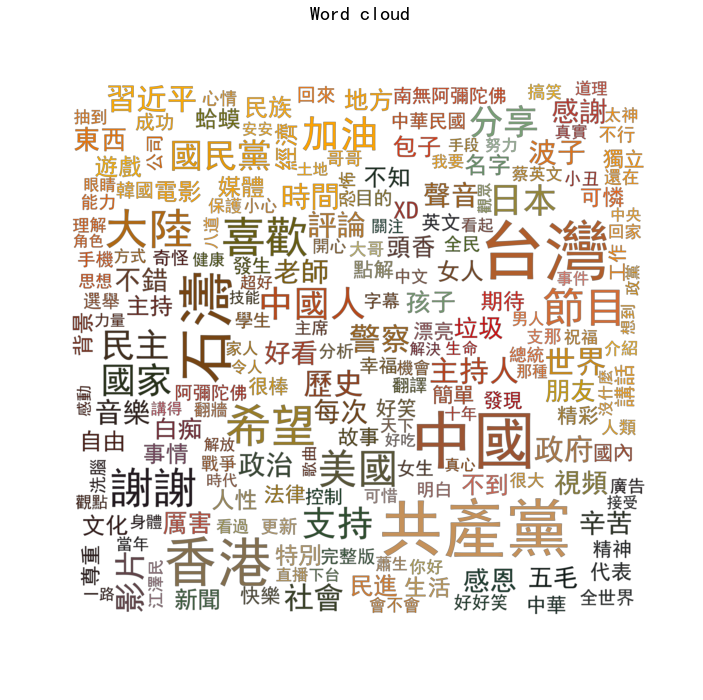

In [243]:
word_tag(text_clean)

## topic modeling
From above merged dataset, we can know that the structure of the dataset contains **"Channel - Video - Comment"** 3 layers, and there are 1757 channels, 3545 videos and 7000 comments. Therefore, we might need to choose which level to do topic modeling. Considering that some comments are only one or two words, the results will not be good if using **Comment** level. I Decide to use Video level and Channel level, and do a comparasion with those two methods.

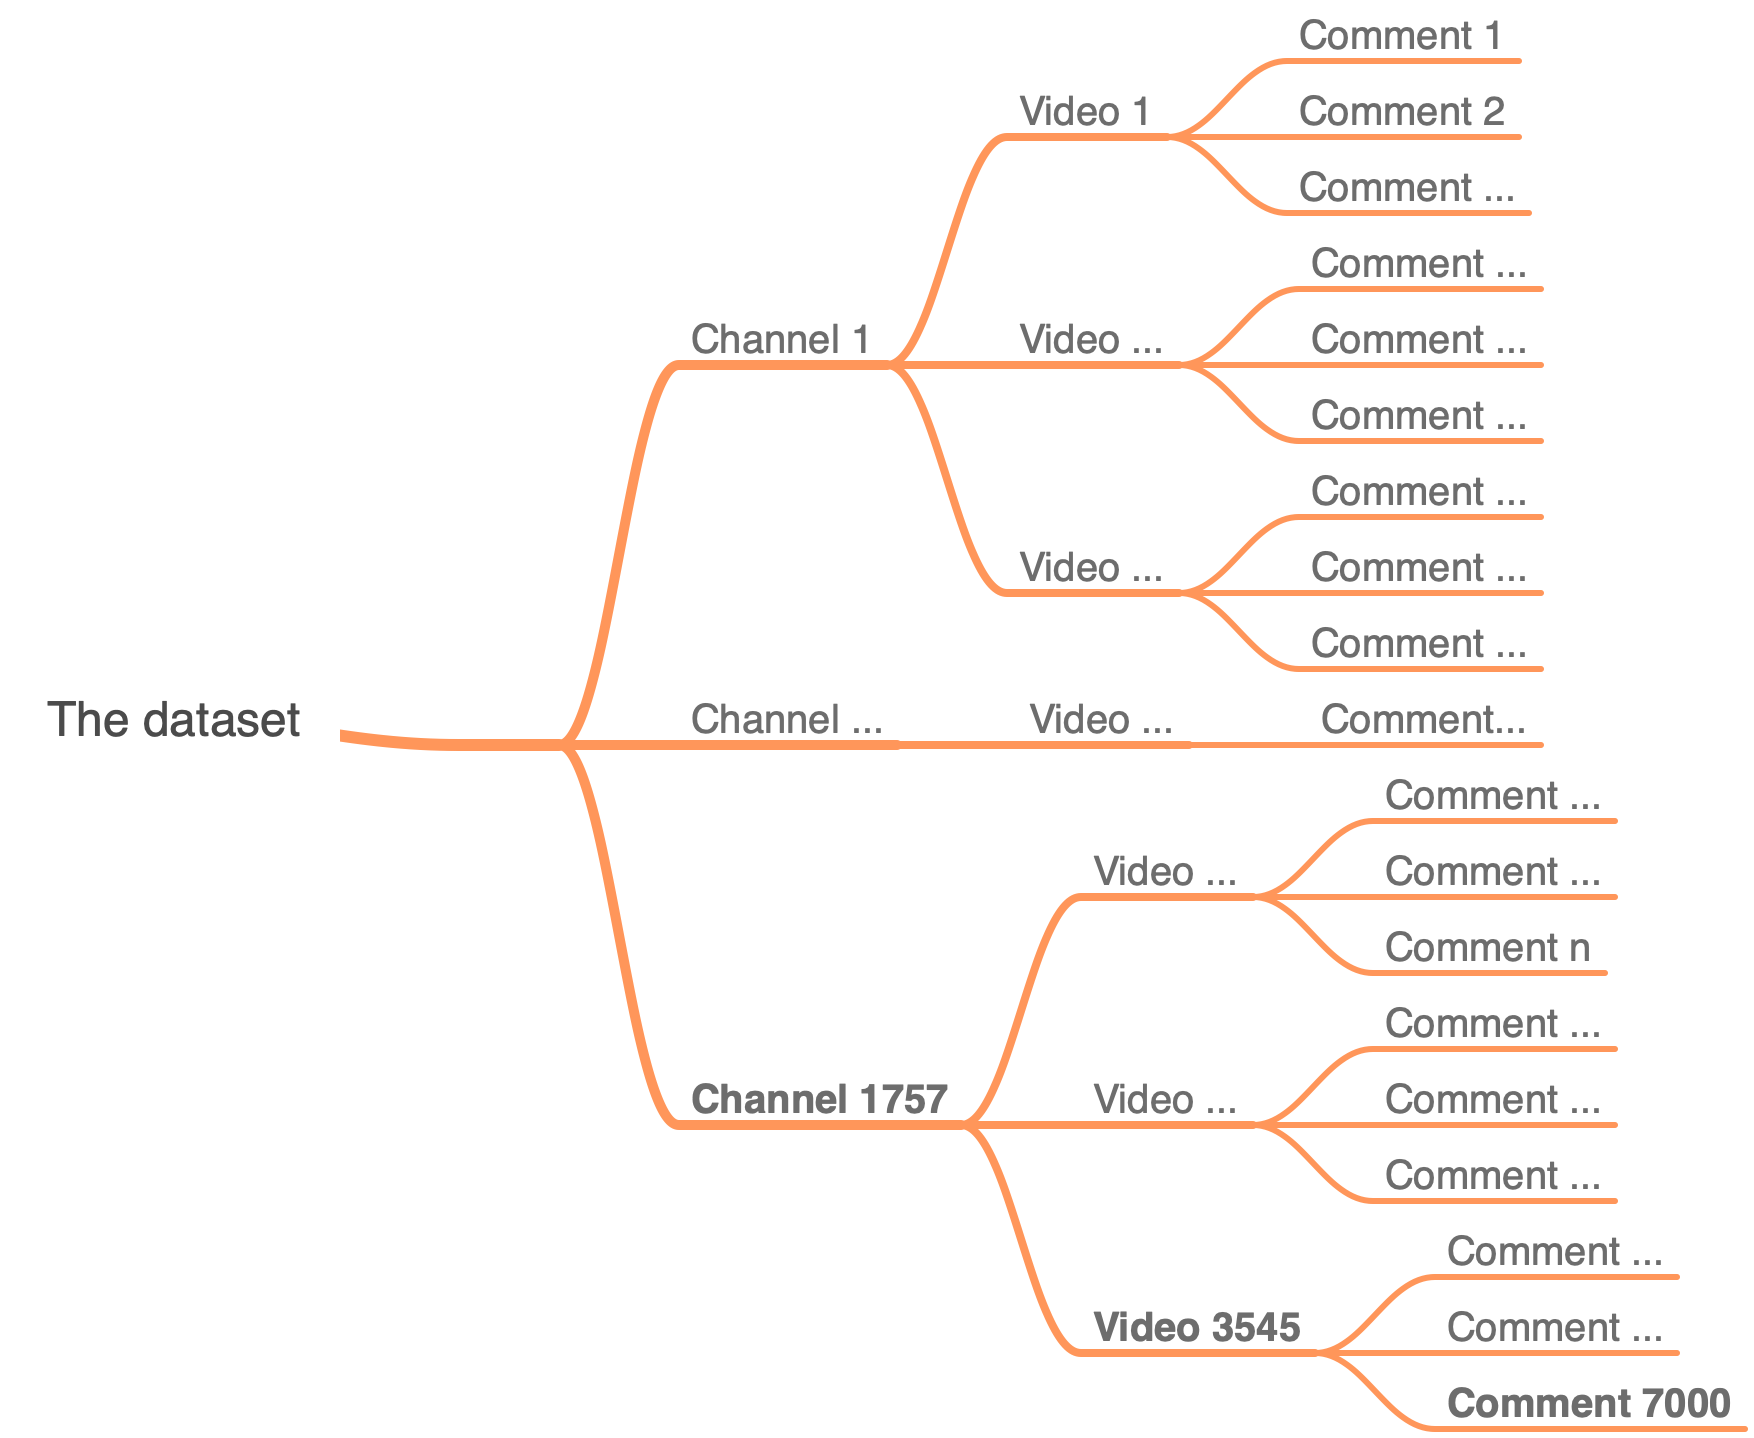

In [35]:
from IPython.display import Image
Image("The dataset.png",width=600, height=600)

In [162]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [163]:
df.head()

commentText           updatedAt      videoId  \
6914                     ÊàëÂÄëË¶ÅÊ±Ç 2016-06-06 23:19:13  67JzSRnyXr4   
683      Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑ 2016-04-24 13:34:55  RPWDeLqsN0g   
1084  ÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñ 2016-01-23 11:19:52  RPWDeLqsN0g   
1285             Âà•ÊääÂ§ßÂÆ∂Áï∂ÁôΩÁô°  Âë®Á•ûÂÅ∑ 2016-04-23 03:22:00  RPWDeLqsN0g   
1448                Ë¢´Êç≤Âà∞ÁÅ´ÊòüÈÇÑÊòØË¶ÅËÅΩ 2016-04-27 07:14:09  RPWDeLqsN0g   

         channelTitle         publishedAt  \
6914           Blippi 2016-05-22 16:30:24   
683   Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2012-09-14 17:49:08   
1084  Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2012-09-14 17:49:08   
1285  Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2012-09-14 17:49:08   
1448  Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music 2012-09-14 17:49:08   

                                                  title   viewCount  \
6914  Learn The Alphabet With Blippi | ABC Letter Boxes  67869205.0   
683   Âë®Êù∞ÂÄ´„ÄêÈæçÊç≤È¢® ÂÆòÊñπÂÆåÊï¥MV„ÄëJay Chou "Tornado" MV (Long-Jua...  13873838.0   
1084  Âë®Êù∞ÂÄ´„ÄêÈæçÊç≤È¢® ÂÆòÊñπÂÆåÊï¥MV„ÄëJay Chou "Tornado" MV (Long-Jua...  13873838.0   
1285  Âë®Êù∞ÂÄ´„ÄêÈæçÊç≤È¢® ÂÆòÊñπÂÆåÊï¥MV„ÄëJay Chou "Tornado" MV (Long-Jua...  13873838.0   
1448  Âë®Êù∞ÂÄ´„ÄêÈæçÊç≤È¢® ÂÆòÊñπÂÆåÊï¥MV„ÄëJay Chou "Tornado" MV (Long-Jua...  13873838.0   

      video_count  
6914          1.0  
683           1.0  
1084          1.0  
1285          1.0  
1448          1.0

In [164]:
df['videoId'].value_counts()

-foZ5RcCm8U    91
qoRdsyxZJzg    38
-S8V29TvZ7Y    34
JAHh85Qgv88    32
pTrELxQ3dbw    31
1hdkpGi3oPo    26
8uhvP8ryU1I    23
2Ftfz3OeBP0    19
gHOHfolpmV8    19
whqGyTPyFrU    18
2bMiVjjrKOI    18
Ir_sbO4x6i0    18
GHqXCf2ej_g    17
tx1c8QRlaHk    17
9xQ_7HQkee0    17
x1meOvD9fAc    17
FAz5ScuHhJs    17
2wEpPCtiZ8M    17
u2oP2VWZOy0    16
6nzITiOJhgs    15
wvnAFrvr3xc    15
GDhBVvd1rlE    15
N2AxoCM9ZaI    15
LhZxDtm_MTo    15
0kDwDSJRNOQ    15
nkKLZTomkhU    15
U8ItusnFzIU    14
rAcwP_v_5Ug    14
ccIOL4ViA5U    14
qX7poSHqsWk    14
               ..
YRt_0Ltee4g     1
gEbG4fPHCVU     1
BbfwypwQ3W4     1
uYjchMWtDGM     1
tJQwSkdnf58     1
iyLup7O43qo     1
pwOhsBoQLc8     1
oqubB_ezUEM     1
kH_xDPASLek     1
8xuC_dN7eEM     1
FqTWqJaGaZI     1
3y6KHRipafQ     1
X7xWw0RxJgg     1
MEu6LJDfiWw     1
W8vTAgXsjZA     1
dqMSLEetp7g     1
cFozQF0sW2I     1
bArq62lvnVg     1
biNFXRMnWKE     1
vQpOWNYAsgk     1
gsALwGuL11A     1
BuKTN6qZMdY     1
AxUsKEUHTzg     1
OqZaBCGTces     1
6qkwKkVUU8

### Video level

In [186]:
df_v = df.groupby('videoId').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_v

videoId                                        commentText  \
0     -0DECBlauZU  Â§öË¨ùÁÑ°ÁßÅÂàÜ‰∫´Âæà‰∏çÈåØÁöÑÊñáÁ´†ÔºåËä±ÊôÇÈñìÁ¥∞Á¥∞ÂìÅÂöêÔΩûÊÑüÊÅ©ÂàÜ‰∫´ÂñîÔºæÔºæÊÑõÁæéÂ∞±Ë¶ÅÁèæÂú®ÈñãÂßãÂ•ΩÂ•Ω‰øùÈ§äÔºå‰∏çË¶Å‰∫ÇÂêÉÔºå...   
1     -0R-KW_zWmE                                                 Ë∂ÖÂÅá   
2     -1-V7GQusJc  Á¨ëÊ≠ª‰∫∫‰∫ÜÈÄ£ÂêçÂ≠óÈÉΩ‰∏çÈ°òÊÑèÊîπÈÇÑË™™ÊúâË™†ÊÑèË¶ÅÊîπÈù©ÔºåÁπºÁ∫åÂ∑¥Ëëó‰∏≠ÂúãÈÇ£ÂÖ©ÂÄãÂ≠óÂ∞±ÊªæÂõû‰∏≠ÂúãÂêßÊÖ¢Ëµ∞‰∏çÈÄÅ„ÄÇÂéª‰Ω†ÁöÑÊùé...   
3     -1g5nzMmFrA  Âì™‰∏™Ê∏∏Ë°åÂëÄÔºåÁªô‰∏™ÈìæÊé•Ê∂õÂì•ÂõûÂΩí‰∫ÜÔºÅËØ¥ÂæóÂ•Ω ‰∏≠ÂçéÂêçÊóèÂ§çËãèËÉúËøá‰∏ÄÂàáÊàë‰∏çÊòØ‰ªÄ‰πà‰∫îÊØõÔºåÊàë‰πüËÆ®ÂéåÂÖ±‰∫ßÂÖöÔºå...   
4     -4KgDDxIqB4                              ÁÇ∫‰ªÄÈ∫ºÊàëÈÉΩÂàÜ‰∏çÂ§™Âá∫‰æÜ‰ªñÂÄëÂÖ©ÂÄãÁöÑËÅ≤Èü≥....   
5     -53xAzBADTc                         ÈÉΩÊîæ‰ªÄ‰πàËøõÂéªÔºåÊîæÂ§öÂ∞ëÈáèÔºåÊÄé‰πàÊ≤°Â£∞Èü≥Ôºå‰πüÊ≤°ÊúâÊñáÂ≠óËØ¥Êòé„ÄÇ   
6     -5IhSgtTZHg   Âë¢ÂÄãÊûóÈÑ≠Âèà‰øÇÂè¶‰∏ÄÂÄãËá™Ë™çË∂ÖÁÑ∂Ê∞∏‰∏çË™çÈåØÁöÑ‰∫∫,ÊàëÂæû‰æÜÈÉΩ‰∏çË™çÁÇ∫ÈÄôÂÄãÁøªËæ¶Ê±üÈùíÁöÑËôï‰∫ãÊñπÊ≥ï,Â•πÂè™ÊòØÂè¶‰∏ÄÂÄãÊ¢ÅÊåØËã±   
7     -5b_6zTACLE                                                  ËÆö   
8     -96ZCf38ovM                                            ‰ªäÂ§©Âèà‰æÜ‰∏ÄÊ¨°‰∫Ü   
9     -9OPVd11ns8                                                  ËÆö   
10    -9xR6c2ovxk                              ‰∏ÄÂºµÁ¥ô ‰Ω†ÂÄë‰πüÂèØ‰ª•ÊãøÂéªÂä†ÁÜ±ÁúüÊòØ‰ΩéËÉΩÈÅéÈ†≠‰∫ÜÂïä   
11    -BEeGjNJraI               ÂîîË≠òÂ∞±Âí™‰∫ÇË©±ÔºåÈú∏Áéã‰∏ãË∑åÈóúÂ§ßÈô∏Á∂ìÊøüÊîæÁ∑©Q‰∫ãÂí©ÔºåÂîîÂêåÁ∂ìÊøüÊîæÁ∑©Â∞±ÂîîÊ¥óË≤∑Ê¥óÈ†≠Ê∞¥Âí©   
12    -DJHsStT00s  ÁèæÂú®ÊîπÁâàÊàëÊúâ‰∏ÄÈªûÂÇ∑ÂøÉÂõ†ÁÇ∫ÁèæÂú®ÊîπÁöÑÂç°ÁâπËº∏Âá∫ËÆäÊÖ¢ËÄå‰∏î‰πüÊòØÊàëÂú®10Á≠âÂâç‰æÜÁé©ÁöÑÁµ¶‰∫ÜÊàëÂæàÂ§öÂõûÊÜ∂Ë´ãÂïè‰∏Ä‰∏ã...   
13    -DhoAhS7-0s                                    Âä†ÈÄôÈ∫ºÂ§öÂÜ∞Â°ä!ÈÄôÊ®£‰πüËÉΩÂñùÂá∫‰ªÄÂë≥   
14    -Fi65STxRwM          ÁÇ∫‰ªÄÈ∫ºÈÇ£ÂÄãÂπ¥‰ª£ÁöÑÈùíÂ∞ëÂπ¥ÈÉΩÈï∑ÊàêÈÇ£Ê®£== ÈÄôÂ∑≤Á∂ì‰∏çÂÉÖÂÉÖÊòØÁ©øËëóÂïèÈ°å„Ñå Èï∑Áõ∏ÈÉΩÊúâÂæàÂ§ß„ÑâÂïèÈ°å   
15    -GuLjK9UMYE                                    ÊàëÂà∑Ê©üÂà∞‰∏ÄÂçäÁï∂Ê©ü  Ë¶ÅÊÄéÈ∫ºÈñãÊ©ü   
16    -I0E0KC2TTs     Áî±ÁªÜÂè´Âà∞Â§ß„ÄÇÈªûÊúÉÂîîË≠òÂè´ÂëÄ„ÄÇÈ¶ôÊ∏Ø‰æùÂÆ∂ËÆäÊàêÂíÅÂëÄ„ÄÇÊàëÂè´ÊàëËàÖÊØçÂè´ÂíóÂπæÂçÅÂπ¥Áõ¥Âà∞‰Ω¢ÈÅéË∫´‰πãÂæåÂÖàÁü•‰Ω¢ÂÄãÂÖ®Âêç„ÄÇ   
17    -IzZ10JRb5c                                                ÁúüÂ•≥Á•û   
18    -JL6ucGysuc  ÊÉ≥Âïè‰∏ãÊàê‰∫∫ÈùûÂπæÈå¢Âì•Âì•Â•ΩÂ§ßËÜΩÁé©Êµ∑ÁõúËàπÔºåÊàëÂ•Ω‰ºº‰∏≠Â≠∏ÂÖàÂ§†ËÜΩÁé©ÂÖ©ÂÄãÂíÅÁªÜÔºåÊúâÊéí‰Ω†ÊπäÂëÄÔºÅÁùáË¶ãÊõø‰Ω†Âπ∏Âπ∏ËæõËã¶...   
19    -JMTn5O6jGQ                          ÊòØÁöÑ,Ë¨õËß£ÂæàÂ•Ω‰ΩÜÊòØÈü≥Ê®ÇËÅ≤Èü≥Â§™È´ò,Âπ¥Á¥ÄÂ§ßÂ∞±ËÅΩ‰∏çÊ∏ÖÊ•ö.   
20    -KdbDFNtdGo                   ÂìáÔºõÂéü‰æÜÂè∞ÁÅ£Âú®11ÊúàÂàù‰πüÊúâÊ•ìÁ¥ÖÂèØÊ¨£Ë≥ûÂì¶ÔºÅÈÇ£Â∞±‰∏çÁî®ÈÅ†Ë°åÂéªÊó•Êú¨‰∫ÜÈòøÔºÅ   
21    -MerQJz4QMY  ÊàëË´óÂîîÂ∞ëÈ¶ôÊ∏Ø‰∫∫ÊàñËÄÖ‰∏≠Âúã‰∫∫ÈÉΩÊúâËÉΩÂäõÂÅöÂà∞‰Ω†Âó∞‰ΩçÊï¥È§ÖÂ∏´ÊâÄÂÅöÊó¢‰∫ãÔºå‰ΩÜÂ¶ÇÊûúÂîî‰øÇÁôºÁîü‰øÇ‰Ω†È§êÂª≥Ôºà‰Ω†‰øÇÂ•ΩËÄÅÈóÜ...   
22    -OblRmtBUto  Êú¨Êù•Ëøô‰∫õÊ†áÈ¢òÊòØÁúüÂøÉÊÉ≥ËÆ¢ÈòÖÁöÑÔºå‰ΩÜ„ÄÇ„ÄÇ„ÄÇËøûËØ¥‰∏™‰∫∫ËØùÁöÑÂãáÊ∞îÈÉΩÊ≤°ÊúâÔºåÂ∞±ÂÖ≥‰∫ÜÊ≠§È¢ëÈÅìÂêß„ÄÇÂûÉÂúæÔºåÊúÄÈ∏°ÂêßËÆ®Âéå...   
23    -POuYFMNZf4                          Â§è‰∫é‰πîË∂äÊù•Ë∂äÁÉ¶‰∫ÜËÄê‰∫∫Â∞ãÂë≥‚ãØ‚ãØ ÈÄôÊàêË™ûÁî®Âú®ÈÄôË£°‰∏çÈÅ©Âêà   
24    -RlT1kNiptA     Ë¨õÂæóÂæàËÆö!Âä™ÂäõÈåÑË£ΩÔºåÊåÅÁ∫å‰∏ãÂéªÂàÜ‰∫´ÊâçÊúÉÊàêÂäü„ÄÇËë£Ë¨õÂ∏´Á•ùÂ•Ω„ÄÇÂ∞ç‰∫ÜÔºåÂ¶ÇÊûú‰Ω†Ë¶∫ÂæóÂñúÊ≠°ÔºåË´ãËøΩËπ§ÊàëÁöÑÈ†ªÈÅì„ÄÇ   
25    -S8V29TvZ7Y  Âè∞ÂåóÂ∏ÇÊîøÂ∫ú‰Ω†‰ª¨Ëøô‰πàÊ¨∫Ë¥ü‰∫∫Ôºå‰Ω†‰ª¨ÁöÑÁà∏Â¶àÁü•ÈÅìÂêóÈÄôÈ∫ºÂ§ßÁöÑ‰∏ÄÂÄãÂ∑•Á®ãÔºåÊàëÂ∞±ÊòØ‰∏çÁõ∏‰ø°Â∏ÇÂ∫úÁöÑÂò¥Áñ±„ÄÇËã•ÊòØÈÅ†ÈõÑ...   
26    -TA9LR6sdH4                                   ÈÇ£È¶ñÊ≠åÂêçÂè´‰ªÄÈ∫ºÔºüÁ±≥Â¶ÉÂÆâÂÆâÂ§™ÂèØÊÑõ‰∫Ü   
27    -TTzIWGu1Cc  (‰∏≠ÂõΩÂ§ñÈïøÁéãÊØÖË™¨‰∏≠ÂõΩ‰∫∫ÂΩìÂπ¥ÊòØÂùêÁùÄÁæéÂõΩÂÜõËà∞ÂéªÊî∂Â§ç‰∏≠ÂõΩÂçóÊ≤ôÁæ§Â≤õÁöÑ)<br /><br />ËôΩÁÑ∂‰∫å...   
28    -Uk5U19rDPQ  ÊàëÂèëÁé∞Âô©Ê¢¶‰πãÂΩ±Á¨¨‰∏â‰∏™ÊäÄËÉΩÊòØLOLÂáØÂçóÊóßÁâàÁöÑWÊäÄËÉΩÂõæÁâáÊäΩÂà∞Â¢ÆÂ§©‰ΩøÊ≥¢Â≠êÁé©ÂàÄÂäçÁâ©Ë™ûÂï¶ÔºåË∂ÖÂ•ΩÁé©Êû∂ÈÑß‰∏ç...   
29    -UwNKktFegE                     ÈôàÂ§ßÂèëÁöÑÁúüÂÆûÔºåÊòØÂæàÂ§öÂ•≥ÊºîÂëòÈÉΩ‰∏çÂÖ∑Â§áÁöÑ„ÄÇÂè∞ÊπæÁöÑÂ•≥ÁîüÈÉΩÊØîËæÉÁúüÂÆû„ÄÇ   
...           ...             

In [187]:
#cut word
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

#set up stopwords
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 
stopwords = stopwordslist('Chinese_Stopwords.txt')

In [188]:
df_v["content_cutted"] = df_v.commentText.apply(to_hk)
df_v["content_cutted"] = df_v.content_cutted.apply(chinese_word_cut)
df_v["content_cutted"] = df_v["content_cutted"].apply(cleaning)

In [189]:
df_v["content_cutted"]

0       Â§öË¨ù ÁÑ°ÁßÅ ÂàÜ‰∫´ Âæà‰∏çÈåØ ÁöÑ ÊñáÁ´† Ôºå Ëä±ÊôÇÈñì Á¥∞Á¥∞ ÂìÅÂöê ÔΩû ÊÑüÊÅ© ÂàÜ‰∫´ Âñî Ôºæ Ôºæ ÊÑõÁæé...
1                                                      Ë∂ÖÂÅá
2       Á¨ëÊ≠ª‰∫∫ ‰∫ÜÈÄ£ ÂêçÂ≠ó ÈÉΩ ‰∏çÈ°ò ÊÑèÊîπ ÈÇÑ Ë™¨ Êúâ Ë™† ÊÑè Ë¶Å ÊîπÈù© Ôºå ÁπºÁ∫å Â∑¥Ëëó ‰∏≠Âúã ÈÇ£ ...
3       Âì™ÂÄã ÈÅäË°å ÂëÄ Ôºå Áµ¶ÂÄã Èèà Êé•Êø§ Âì• Ëø¥ Ê≠∏ ‰∫Ü ÔºÅ Ë™¨ Âæó Â•Ω   ‰∏≠ËèØÂêçÊóè Âæ© Áî¶ Âãù...
4                         ÁÇ∫ ‰ªÄÈ∫º Êàë ÈÉΩ ÂàÜ‰∏çÂ§™Âá∫ ‰æÜ ‰ªñÂÄë ÂÖ©ÂÄã ÁöÑ ËÅ≤Èü≥ ....
5              ÈÉΩ Êîæ‰ªÄÈ∫º ÈÄ≤Âéª Ôºå ÊîæÂ§ö Â∞ëÈáè Ôºå ÊÄéÈ∫º Ê≤íËÅ≤Èü≥ Ôºå ‰πü Ê≤í Êúâ ÊñáÂ≠ó Ë™¨ Êòé „ÄÇ
6       Âë¢ ÂÄã Êûó ÈÑ≠ Âèà ‰øÇ Âè¶ ‰∏ÄÂÄã Ëá™Ë™ç Ë∂ÖÁÑ∂ Ê∞∏‰∏ç Ë™çÈåØ ÁöÑ ‰∫∫ , Êàë Âæû ‰æÜ ÈÉΩ ‰∏ç Ë™ç...
7                                                       ËÆö
8                                             ‰ªäÂ§© Âèà ‰æÜ ‰∏ÄÊ¨° ‰∫Ü
9                                                       ËÆö
10                      ‰∏ÄÂºµÁ¥ô   ‰Ω†ÂÄë ‰πü ÂèØ‰ª• Êãø Âéª Âä†ÁÜ± ÁúüÊòØ ‰ΩéËÉΩ ÈÅéÈ†≠ ‰∫Ü 

In [190]:
# get stopwords
# get vectorized data and prepare for lda model
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words= stopwords,
                                max_df = 0.5,
                                min_df = 10)
data_vectorized = tf_vectorizer.fit_transform(df_v.content_cutted)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['5f', 'by', 'lex'] not in stop_words.



In [191]:
data_vectorized

<3545x612 sparse matrix of type '<class 'numpy.int64'>'
	with 12120 stored elements in Compressed Sparse Row format>

In [192]:
#train lda model
n_topics = 5
lda_model = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                evaluate_every = -1,
                                learning_decay=0.5)
# lda_model.fit(tf)
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model) 

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


The following are the top 5 topic about the aggregation of the comments in **video level**. We can see that:
* Topic 0 is about taiwan and regional issues 
* Topic 1 is about the politics and China
* Topic 2 is about Hong Kong and film
* Topic 3 is about Music and show
* Topic 4 is also about the politics, but in a more nagtive way, you can see people are aruging with each others by the words ÂåÖÂ≠êÔºå ‰∫îÊØõ

In [193]:
#get words of the topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]                        
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#you can change number of n_top_words
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic #0:
Âè∞ÁÅ£ Êó•Êú¨ ËÅ≤Èü≥ ÁôΩÁó¥ Â•ΩÁúã ÁîüÂëΩ ‰∏çÂà∞ Âé≤ÂÆ≥ ÂêçÂ≠ó Ë®òËÄÖ ÂÖ¨Âè∏ Ëã±Êñá Áî∑Áîü ÁôºÁèæ ‰∏ªÊåÅ ‰∏äÊµ∑ Ë¨õË©± Â•ΩÁ¨ë Êõ¥Êñ∞ ÂèØÊÉú
Topic #1:
‰∏≠Âúã Ê∞ë‰∏ª Âè∞ÁÅ£ ÊîøÊ≤ª Â§ßÈô∏ Á§æÊúÉ ‰∏≠ÂÖ± ÂúãÂÆ∂ ÊîøÂ∫ú ‰∏ñÁïå ÂúãÊ∞ëÈª® Ëá™Áî± Ê≠∑Âè≤ Ê∞ëÊóè Á∂ìÊøü ‰∏≠Âúã‰∫∫ Âú∞Êñπ ÂÖ±Áî¢Èª® ÂäõÈáè ÊñáÂåñ
Topic #2:
È¶ôÊ∏Ø Âä†Ê≤π ÂΩ±Áâá ÂûÉÂúæ ‰∏ªÊåÅ‰∫∫ ÊØèÊ¨° Êù±Ë•ø ÊôÇÈñì ÊïÖ‰∫ã ÂàÜ‰∫´ Ë¶ñÈ†ª Á∞°ÂñÆ ÊñπÊ≥ï Âõû‰æÜ ‰∫∫Áîü ÊîØÈÇ£ Âä™Âäõ ÈüìÂúã Á∂≤Á´ô ÊúâÁî®
Topic #3:
ÂñúÊ≠° Â∏åÊúõ Ë≠¶ÂØü ËÄÅÂ∏´ ÊîØÊåÅ Â≠©Â≠ê Â•≥‰∫∫ ÊúãÂèã ‰∏çÈåØ Èü≥Ê®Ç ËæõËã¶ Áî∑‰∫∫ Âπ∏Á¶è ËÉåÊôØ Â∞äÈáç ÈñãÂøÉ ÁØÄÁõÆ Âì•Âì• ÂæàÊ£í ÁúüÂøÉ
Topic #4:
Ë¨ùË¨ù ‰∏≠ÂÖ± Êø§Âì• ÁØÄÁõÆ ÁæéÂúã Áü≥Êø§ ÂÖ±Âå™ ‰∏≠Âúã‰∫∫ ÂÖ±Áî¢Èª® ÂåÖÂ≠ê ‰∏çÁü• ‰∫îÊØõ ÊÑüÊÅ© Ë©ïË´ñ ÂàÜ‰∫´ ÈõªÂΩ± ‰∫∫ÊÄß Ëõ§ËüÜ ÊÑüË¨ù ‰∫ãÊÉÖ



The following are the visualization about the top 5 topics. topic about politics and China is the most dominant one.
* Note that the topic number is not the same as the above. But you can click each circle to see which topic it is
* The area of circle represents the importance of each topic over the entire corpus, the larger the cicle is, the more important this topic is
* The distance between the center of circles indicate the similarity between topics.

In [194]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
ldavis_prepared = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, tf_vectorizer)
pyLDAvis.save_html(ldavis_prepared,'lda topics - video level.html')
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, tf_vectorizer,mds='tsne')

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1      72.441277  -37.951199       1        1  57.168947
4      -9.300237  -52.581253       2        1  14.854071
3      21.730757    0.611396       3        1  10.264937
0      60.161160  -98.114014       4        1   8.952892
2      -1.617545 -113.681328       5        1   8.759153, topic_info=     Category        Freq Term       Total  loglift  logprob
term                                                        
601   Default  303.000000   È¶ôÊ∏Ø  303.000000  30.0000  30.0000
136   Default  406.000000   Âè∞ÁÅ£  406.000000  29.0000  29.0000
150   Default  113.000000   ÂñúÊ≠°  113.000000  28.0000  28.0000
376   Default  448.000000   Ê∞ë‰∏ª  448.000000  27.0000  27.0000
30    Default  289.000000   ‰∏≠ÂÖ±  289.000000  26.0000  26.0000
113   Default   86.000000   Âä†Ê≤π   86.000000  25.0000  25.0000
31    Default  586.000000   ‰∏≠Âúã  586.000000  24.0000  24.0000
531   Default   99.000000   Ë¨ùË¨ù   99.000000  23.0000  23.0000
398   Default   90.000000   Êø§Âì•   90.000000  22.0000  22.0000
333   Default   98.000000   Êó•Êú¨   98.000000  21.0000  21.0000
240   Default  144.000000   Â∏åÊúõ  144.000000  20.0000  20.0000
479   Default  149.000000   ÁæéÂúã  149.000000  19.0000  19.0000
533   Default   68.000000   Ë≠¶ÂØü   68.000000  18.0000  18.0000
307   Default  110.000000   ÊîØÊåÅ  110.000000  17.0000  17.0000
457   Default  112.000000   ÁØÄÁõÆ  112.000000  16.0000  16.0000
443   Default   74.000000   Áü≥Êø§   74.000000  15.0000  15.0000
250   Default   54.000000   ÂΩ±Áâá   54.000000  14.0000  14.0000
485   Default   57.000000   ËÄÅÂ∏´   57.000000  13.0000  13.0000
170   Default   54.000000   ÂûÉÂúæ   54.000000  12.0000  12.0000
32    Default  141.000000  ‰∏≠Âúã‰∫∫  141.000000  11.0000  11.0000
100   Default   63.000000   ÂÖ±Âå™   63.000000  10.0000  10.0000
102   Default  129.000000  ÂÖ±Áî¢Èª®  129.000000   9.0000   9.0000
41    Default   48.000000  ‰∏ªÊåÅ‰∫∫   48.000000   8.0000   8.0000
206   Default   50.000000   Â≠©Â≠ê   50.000000   7.0000   7.0000
374   Default   46.000000   ÊØèÊ¨°   46.000000   6.0000   6.0000
315   Default  211.000000   ÊîøÊ≤ª  211.000000   5.0000   5.0000
359   Default   61.000000   Êù±Ë•ø   61.000000   4.0000   4.0000
190   Default   44.000000   Â•≥‰∫∫   44.000000   3.0000   3.0000
446   Default  202.000000   Á§æÊúÉ  202.000000   2.0000   2.0000
416   Default   44.000000   ÁîüÂëΩ   44.000000   1.0000   1.0000
...       ...         ...  ...         ...      ...      ...
436    Topic5   18.778709   ÁúãÈÅé   19.574675   2.3936  -4.4564
170    Topic5   51.818490   ÂûÉÂúæ   54.376170   2.3869  -3.4414
423    Topic5   15.521813   ÁïôË®Ä   16.311764   2.3854  -4.6469
494    Topic5   15.303893   Ëá™‰ª•   16.084537   2.3853  -4.6610
540    Topic5   15.060480   Ë∂ÖÂ•Ω   15.831587   2.3851  -4.6771
62     Topic5   14.362112   ‰ªãÁ¥π   15.137069   2.3825  -4.7246
25     Topic5   14.512120   ‰∏çË¶ã   15.296521   2.3824  -4.7142
204    Topic5   13.582668   Â™ΩÂ™Ω   14.360145   2.3794  -4.7804
80     Topic5   13.879975   ÂÅöÂ•Ω   14.692765   2.3782  -4.7587
588    Topic5   12.987632   Èõ£ÈÅé   13.766572   2.3768  -4.8252
571    Topic5   12.439027   ÈÇÑÂ•Ω   13.212579   2.3747  -4.8683
195    Topic5   11.930108   Â•ΩÂêÉ   12.697546   2.3727  -4.9101
486    Topic5   11.906359   ËÄÅÊØç   12.675686   2.3725  -4.9121
509    Topic5   11.417532   Ë°®ÊÉÖ   12.197815   2.3690  -4.9540
435    Topic5   11.136646   ÁúãËµ∑   11.910745   2.3679  -4.9789
541    Topic5   10.989354   Ë∂ÖÁ¥ö   11.767603   2.3666  -4.9922
237    Topic5   10.784248   Â∑•Ë≥á   11.559979   2.3656  -5.0111
311    Topic5   10.899710   ÊîªÊìä   11.685951   2.3654  -5.0004
489    Topic5   10.748100   ËÅΩÂà∞   11.527801   2.3650  -5.0144
318    Topic5   27.052628   ÊïÖ‰∫ã   35.845061   2.1536  -4.0914
475    Topic5   18.980319   Á∂≤Á´ô   24.362383   2.1854  -4.4458
514    Topic5   26.121154   Ë¶ñÈ†ª   38.468182   2.048

In [195]:
topic=[]
for i in range(len(lda_output)):
    t = dict((k,lda_output[i][k]) for k in range(len(lda_output[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True) # Take the topic with the highest probability as the subject of the text
    if topic_id[0][1] == 0.2:
        topic_id = 'neither,the comments is too short'
    else:
        topic_id = topic_id[0][0]
    topic.append(topic_id)

In [196]:
lda_output[0]

array([0.01217483, 0.01178884, 0.20475987, 0.01229826, 0.75897819])

In [197]:
df_v['topic'] = topic

In [198]:
df_v

videoId                                        commentText  \
0     -0DECBlauZU  Â§öË¨ùÁÑ°ÁßÅÂàÜ‰∫´Âæà‰∏çÈåØÁöÑÊñáÁ´†ÔºåËä±ÊôÇÈñìÁ¥∞Á¥∞ÂìÅÂöêÔΩûÊÑüÊÅ©ÂàÜ‰∫´ÂñîÔºæÔºæÊÑõÁæéÂ∞±Ë¶ÅÁèæÂú®ÈñãÂßãÂ•ΩÂ•Ω‰øùÈ§äÔºå‰∏çË¶Å‰∫ÇÂêÉÔºå...   
1     -0R-KW_zWmE                                                 Ë∂ÖÂÅá   
2     -1-V7GQusJc  Á¨ëÊ≠ª‰∫∫‰∫ÜÈÄ£ÂêçÂ≠óÈÉΩ‰∏çÈ°òÊÑèÊîπÈÇÑË™™ÊúâË™†ÊÑèË¶ÅÊîπÈù©ÔºåÁπºÁ∫åÂ∑¥Ëëó‰∏≠ÂúãÈÇ£ÂÖ©ÂÄãÂ≠óÂ∞±ÊªæÂõû‰∏≠ÂúãÂêßÊÖ¢Ëµ∞‰∏çÈÄÅ„ÄÇÂéª‰Ω†ÁöÑÊùé...   
3     -1g5nzMmFrA  Âì™‰∏™Ê∏∏Ë°åÂëÄÔºåÁªô‰∏™ÈìæÊé•Ê∂õÂì•ÂõûÂΩí‰∫ÜÔºÅËØ¥ÂæóÂ•Ω ‰∏≠ÂçéÂêçÊóèÂ§çËãèËÉúËøá‰∏ÄÂàáÊàë‰∏çÊòØ‰ªÄ‰πà‰∫îÊØõÔºåÊàë‰πüËÆ®ÂéåÂÖ±‰∫ßÂÖöÔºå...   
4     -4KgDDxIqB4                              ÁÇ∫‰ªÄÈ∫ºÊàëÈÉΩÂàÜ‰∏çÂ§™Âá∫‰æÜ‰ªñÂÄëÂÖ©ÂÄãÁöÑËÅ≤Èü≥....   
5     -53xAzBADTc                         ÈÉΩÊîæ‰ªÄ‰πàËøõÂéªÔºåÊîæÂ§öÂ∞ëÈáèÔºåÊÄé‰πàÊ≤°Â£∞Èü≥Ôºå‰πüÊ≤°ÊúâÊñáÂ≠óËØ¥Êòé„ÄÇ   
6     -5IhSgtTZHg   Âë¢ÂÄãÊûóÈÑ≠Âèà‰øÇÂè¶‰∏ÄÂÄãËá™Ë™çË∂ÖÁÑ∂Ê∞∏‰∏çË™çÈåØÁöÑ‰∫∫,ÊàëÂæû‰æÜÈÉΩ‰∏çË™çÁÇ∫ÈÄôÂÄãÁøªËæ¶Ê±üÈùíÁöÑËôï‰∫ãÊñπÊ≥ï,Â•πÂè™ÊòØÂè¶‰∏ÄÂÄãÊ¢ÅÊåØËã±   
7     -5b_6zTACLE                                                  ËÆö   
8     -96ZCf38ovM                                            ‰ªäÂ§©Âèà‰æÜ‰∏ÄÊ¨°‰∫Ü   
9     -9OPVd11ns8                                                  ËÆö   
10    -9xR6c2ovxk                              ‰∏ÄÂºµÁ¥ô ‰Ω†ÂÄë‰πüÂèØ‰ª•ÊãøÂéªÂä†ÁÜ±ÁúüÊòØ‰ΩéËÉΩÈÅéÈ†≠‰∫ÜÂïä   
11    -BEeGjNJraI               ÂîîË≠òÂ∞±Âí™‰∫ÇË©±ÔºåÈú∏Áéã‰∏ãË∑åÈóúÂ§ßÈô∏Á∂ìÊøüÊîæÁ∑©Q‰∫ãÂí©ÔºåÂîîÂêåÁ∂ìÊøüÊîæÁ∑©Â∞±ÂîîÊ¥óË≤∑Ê¥óÈ†≠Ê∞¥Âí©   
12    -DJHsStT00s  ÁèæÂú®ÊîπÁâàÊàëÊúâ‰∏ÄÈªûÂÇ∑ÂøÉÂõ†ÁÇ∫ÁèæÂú®ÊîπÁöÑÂç°ÁâπËº∏Âá∫ËÆäÊÖ¢ËÄå‰∏î‰πüÊòØÊàëÂú®10Á≠âÂâç‰æÜÁé©ÁöÑÁµ¶‰∫ÜÊàëÂæàÂ§öÂõûÊÜ∂Ë´ãÂïè‰∏Ä‰∏ã...   
13    -DhoAhS7-0s                                    Âä†ÈÄôÈ∫ºÂ§öÂÜ∞Â°ä!ÈÄôÊ®£‰πüËÉΩÂñùÂá∫‰ªÄÂë≥   
14    -Fi65STxRwM          ÁÇ∫‰ªÄÈ∫ºÈÇ£ÂÄãÂπ¥‰ª£ÁöÑÈùíÂ∞ëÂπ¥ÈÉΩÈï∑ÊàêÈÇ£Ê®£== ÈÄôÂ∑≤Á∂ì‰∏çÂÉÖÂÉÖÊòØÁ©øËëóÂïèÈ°å„Ñå Èï∑Áõ∏ÈÉΩÊúâÂæàÂ§ß„ÑâÂïèÈ°å   
15    -GuLjK9UMYE                                    ÊàëÂà∑Ê©üÂà∞‰∏ÄÂçäÁï∂Ê©ü  Ë¶ÅÊÄéÈ∫ºÈñãÊ©ü   
16    -I0E0KC2TTs     Áî±ÁªÜÂè´Âà∞Â§ß„ÄÇÈªûÊúÉÂîîË≠òÂè´ÂëÄ„ÄÇÈ¶ôÊ∏Ø‰æùÂÆ∂ËÆäÊàêÂíÅÂëÄ„ÄÇÊàëÂè´ÊàëËàÖÊØçÂè´ÂíóÂπæÂçÅÂπ¥Áõ¥Âà∞‰Ω¢ÈÅéË∫´‰πãÂæåÂÖàÁü•‰Ω¢ÂÄãÂÖ®Âêç„ÄÇ   
17    -IzZ10JRb5c                                                ÁúüÂ•≥Á•û   
18    -JL6ucGysuc  ÊÉ≥Âïè‰∏ãÊàê‰∫∫ÈùûÂπæÈå¢Âì•Âì•Â•ΩÂ§ßËÜΩÁé©Êµ∑ÁõúËàπÔºåÊàëÂ•Ω‰ºº‰∏≠Â≠∏ÂÖàÂ§†ËÜΩÁé©ÂÖ©ÂÄãÂíÅÁªÜÔºåÊúâÊéí‰Ω†ÊπäÂëÄÔºÅÁùáË¶ãÊõø‰Ω†Âπ∏Âπ∏ËæõËã¶...   
19    -JMTn5O6jGQ                          ÊòØÁöÑ,Ë¨õËß£ÂæàÂ•Ω‰ΩÜÊòØÈü≥Ê®ÇËÅ≤Èü≥Â§™È´ò,Âπ¥Á¥ÄÂ§ßÂ∞±ËÅΩ‰∏çÊ∏ÖÊ•ö.   
20    -KdbDFNtdGo                   ÂìáÔºõÂéü‰æÜÂè∞ÁÅ£Âú®11ÊúàÂàù‰πüÊúâÊ•ìÁ¥ÖÂèØÊ¨£Ë≥ûÂì¶ÔºÅÈÇ£Â∞±‰∏çÁî®ÈÅ†Ë°åÂéªÊó•Êú¨‰∫ÜÈòøÔºÅ   
21    -MerQJz4QMY  ÊàëË´óÂîîÂ∞ëÈ¶ôÊ∏Ø‰∫∫ÊàñËÄÖ‰∏≠Âúã‰∫∫ÈÉΩÊúâËÉΩÂäõÂÅöÂà∞‰Ω†Âó∞‰ΩçÊï¥È§ÖÂ∏´ÊâÄÂÅöÊó¢‰∫ãÔºå‰ΩÜÂ¶ÇÊûúÂîî‰øÇÁôºÁîü‰øÇ‰Ω†È§êÂª≥Ôºà‰Ω†‰øÇÂ•ΩËÄÅÈóÜ...   
22    -OblRmtBUto  Êú¨Êù•Ëøô‰∫õÊ†áÈ¢òÊòØÁúüÂøÉÊÉ≥ËÆ¢ÈòÖÁöÑÔºå‰ΩÜ„ÄÇ„ÄÇ„ÄÇËøûËØ¥‰∏™‰∫∫ËØùÁöÑÂãáÊ∞îÈÉΩÊ≤°ÊúâÔºåÂ∞±ÂÖ≥‰∫ÜÊ≠§È¢ëÈÅìÂêß„ÄÇÂûÉÂúæÔºåÊúÄÈ∏°ÂêßËÆ®Âéå...   
23    -POuYFMNZf4                          Â§è‰∫é‰πîË∂äÊù•Ë∂äÁÉ¶‰∫ÜËÄê‰∫∫Â∞ãÂë≥‚ãØ‚ãØ ÈÄôÊàêË™ûÁî®Âú®ÈÄôË£°‰∏çÈÅ©Âêà   
24    -RlT1kNiptA     Ë¨õÂæóÂæàËÆö!Âä™ÂäõÈåÑË£ΩÔºåÊåÅÁ∫å‰∏ãÂéªÂàÜ‰∫´ÊâçÊúÉÊàêÂäü„ÄÇËë£Ë¨õÂ∏´Á•ùÂ•Ω„ÄÇÂ∞ç‰∫ÜÔºåÂ¶ÇÊûú‰Ω†Ë¶∫ÂæóÂñúÊ≠°ÔºåË´ãËøΩËπ§ÊàëÁöÑÈ†ªÈÅì„ÄÇ   
25    -S8V29TvZ7Y  Âè∞ÂåóÂ∏ÇÊîøÂ∫ú‰Ω†‰ª¨Ëøô‰πàÊ¨∫Ë¥ü‰∫∫Ôºå‰Ω†‰ª¨ÁöÑÁà∏Â¶àÁü•ÈÅìÂêóÈÄôÈ∫ºÂ§ßÁöÑ‰∏ÄÂÄãÂ∑•Á®ãÔºåÊàëÂ∞±ÊòØ‰∏çÁõ∏‰ø°Â∏ÇÂ∫úÁöÑÂò¥Áñ±„ÄÇËã•ÊòØÈÅ†ÈõÑ...   
26    -TA9LR6sdH4                                   ÈÇ£È¶ñÊ≠åÂêçÂè´‰ªÄÈ∫ºÔºüÁ±≥Â¶ÉÂÆâÂÆâÂ§™ÂèØÊÑõ‰∫Ü   
27    -TTzIWGu1Cc  (‰∏≠ÂõΩÂ§ñÈïøÁéãÊØÖË™¨‰∏≠ÂõΩ‰∫∫ÂΩìÂπ¥ÊòØÂùêÁùÄÁæéÂõΩÂÜõËà∞ÂéªÊî∂Â§ç‰∏≠ÂõΩÂçóÊ≤ôÁæ§Â≤õÁöÑ)<br /><br />ËôΩÁÑ∂‰∫å...   
28    -Uk5U19rDPQ  ÊàëÂèëÁé∞Âô©Ê¢¶‰πãÂΩ±Á¨¨‰∏â‰∏™ÊäÄËÉΩÊòØLOLÂáØÂçóÊóßÁâàÁöÑWÊäÄËÉΩÂõæÁâáÊäΩÂà∞Â¢ÆÂ§©‰ΩøÊ≥¢Â≠êÁé©ÂàÄÂäçÁâ©Ë™ûÂï¶ÔºåË∂ÖÂ•ΩÁé©Êû∂ÈÑß‰∏ç...   
29    -UwNKktFegE                     ÈôàÂ§ßÂèëÁöÑÁúüÂÆûÔºåÊòØÂæàÂ§öÂ•≥ÊºîÂëòÈÉΩ‰∏çÂÖ∑Â§áÁöÑ„ÄÇÂè∞ÊπæÁöÑÂ•≥ÁîüÈÉΩÊØîËæÉÁúüÂÆû„ÄÇ   
...           ...             

In video level, the following are the topic counts in 3545 videos, except the comments that are too short to be classified, we can see that the topic are distributed evenly, and topic 3 (Music and show) is the relatively dominant topic 

In [199]:
df_v['topic'].value_counts()

neither,the comments is too short    1409
3                                     509
1                                     470
4                                     412
0                                     393
2                                     352
Name: topic, dtype: int64

In [200]:
df_v = df_v.sort_values(by='viewCount',ascending = False)

After I sort the video-level data by **viewCount** from the highest to lowest, we can found out half of the top 10 most viewed video are the topic 3(Music and show), which may illustrate that people are more likely to watch video in this topic(**not considering the sample data bias**)

In [201]:
df_v[:11]

videoId                                        commentText  \
1552  RPWDeLqsN0g  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...   
39    -foZ5RcCm8U  ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...   
406   67JzSRnyXr4                                               ÊàëÂÄëË¶ÅÊ±Ç   
2916  ooqDc0Ig174  ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   
562   8uhvP8ryU1I  Áâà‰∏ª‰ª•ÂæåËÉΩ‰∏çËÉΩÊääÈü≥ÈáèË™øÂ§ßËÅ≤‰∏ÄÈªû, ÊàëÂ∑≤Á∂ìË™øÂà∞ÊúÄÂ§ßËÅ≤, Èü≥ÈáèÈÇÑÊòØÂæàÂ∞è„ÄÇÈõñÁÑ∂ÈÄôÈõÜÊ≤íÊúâÂæê‰Ω≥Áë©ÂíåÈªÉËá¥...   
1098  JAHh85Qgv88  ‰Ω†Ë¨õË©±Ë∂ÖÂø´ÁöÑÂíßÊàëËø∑Ë∑Ø‰∫ÜÔºåËÄå‰∏îÊàëÈÄõ‰∫Ü4Â∞èÊôÇÂ∑¶Âè≥ÔºåÂÆåÂÖ®Ê≤íÊúâÊî∂Á©´ÊÄéÈ∫ºÊ≤íÊúâ‰ªãÁ¥π‰∏Ä‰∏ãÂúüÊí•Èº†Âë¢ÔºüÔºüÂª¢Áâ©Èòø...   
155   1hdkpGi3oPo  ÊúâÊó∂ÂÄôÁúüÂØπËøô‰∏™ËäÇÁõÆÊó†ËØ≠‰∫ÜÂëµÂëµÂìíÊàëÊúâÂÜáË™çÈåØÔºüÈªûËß£Â•Ω‰ººË¶ãÂà∞ËªäÂ§™ÁÇ´?ÂØπ‰∏çËµ∑ÂÖ≥ÂñÜÂíåÈáëÂøóÊñáÔºåÈÉΩÂø´Ëøõ‰∫ÜÂºµ...   
1814  VlfYnQjUgV4  Â¶àÁöÑÊô∫ÈöúÂçßÊßΩ‰Ω†Â¶àËøôÁßç‰∏úË•øÊú¨Êù•Â∞±ÁúãÁùÄÊÅêÊÄñËøòÊïÖÊÑèÊêûÂá∫Âêì‰∫∫ÁöÑ‰∏úË•øÊòØ‰∏çÊòØÂ¶àÁöÑÊô∫ÈöúÔºüÂ•ΩÂÅáÈõ™Âú∞ÁöÑÂöáÂà∞Êàë‰∫Ü...   
2647  jOxzAsnx9-0                                   Â•≥‰∏ªËßíÂÉèÊòÜÂáåÈñìÂ•èÁúüÁöÑÂæàÊ£íÊúÄÊÑõÁöÑÊ≠å   
413   6HoWzdhhYlY                       Â¶≥ÁöÑÂêçÂ≠óÂ•ΩÂÉèÊàëÁöÑÊúãÂèãÁöÑÂêçÂ≠óÂî±Ê≠åÁöÑÂ•≥ÁîüÊõ¥ÁæéÈÖ∑ÊàëÁµ¶‰Ω†‰∏ÄËê¨ÂÄãËÆö   
2853  nkKLZTomkhU  ÂôÅÈªë‰∫ÜÁÇπÈÄôÂ•≥Áõ¥Êí≠ÊòØÈÇ£ÂÄãÁõ¥Êí≠Âπ≥Âè∞ÊúÄÈ®∑ ÊúÄÂñ™ÂøÉÁóÖÁãÇÁöÑ‰∏ÄÂÄã‰∫ÜÊÉ≥Âú®ÁúãÂ¶≥Áõ¥Êí≠ËØ∑ÈóÆÁ¨¨‰∏ÄÈ¶ñÊ≠åÂè´‰ªÄ‰πàÂêçÂ≠óÂ•ΩÊÉ≥...   

        viewCount                                     content_cutted  \
1552  152612218.0  Èô≥ ÊÄ°Ëìâ ‰ª•Ââç Â•Ω Ê∏ÖÊñ∞ ËÑ± Ôºå ÁèæÂú® ËÆäÂæó Â•Ω‰øó „ÄÅ ÂúüÂúü ÁöÑ ÂçÅÂ§öÂπ¥ Ââç Ôºå Áï∂Âàù ÊâÄ ...   
39     90573301.0  ÈèàÊé• ÈèàÊé• Âêß ÁöÑ ‰∫∫Âì°‰æÜ ‰∏ç Áü•ÈÅì ‰ª•ÂæåÁâàÂúñ ÈÇÑÊúÉ ÊÄéÈ∫º ËÆä ÊúÄÂæåÈü≥ Ê®ÇÂ•Ω ÊÇ≤ÊÖò „ÄÇ ÁúãÁùÄ...   
406    67869205.0                                              ÊàëÂÄë Ë¶ÅÊ±Ç   
2916   24013032.0  Êàë ÁöÑ Â∑¶ËÄ≥ Â•Ω ÂØÇÂØû Âú® Áï∂ÂÖµ ÊôÇÈÅá ÂÖµËÆä Ôºå ÈÄô È¶ñÊ≠å Ë∑ü Êàë Âú® Âè∞‰∏≠Ê∏Ø ËÅ¥ ‰∫Ü ‰∫åÂπ¥...   
562    14066662.0  Áâà‰∏ª ‰ª•ÂæåËÉΩ ‰∏çËÉΩ Êää Èü≥Èáè Ë™øÂ§ßËÅ≤ ‰∏ÄÈªû ,   Êàë Â∑≤ Á∂ìË™ø Âà∞ ÊúÄÂ§ß ËÅ≤ ,   Èü≥Èáè...   
1098   12827552.0  ‰Ω† Ë¨õË©± Ë∂ÖÂø´ ÁöÑ Âíß Êàë Ëø∑Ë∑Ø ‰∫Ü Ôºå ËÄå‰∏î Êàë ÈÄõ ‰∫Ü 4 Â∞èÊôÇ Â∑¶Âè≥ Ôºå ÂÆåÂÖ® Ê≤íÊúâ ...   
155    11805794.0  Êúâ ÊôÇÂÄô Áúü Â∞ç ÈÄôÂÄã ÁØÄÁõÆ ÁÑ°Ë™û ‰∫Ü ÂëµÂëµ Âô† Êàë Êúâ ÂÜá Ë™çÈåØ Ôºü ÈªûËß£ Â•Ω‰ºº Ë¶ã Âà∞ ...   
1814   10500945.0  Â™ΩÁöÑ Êô∫Èöú ÂçßÊßΩ ‰Ω†Â™Ω ÈÄôÁ®Æ Êù±Ë•øÊú¨ ‰æÜ Â∞± ÁúãÁùÄ ÊÅêÊÄñ ÈÇÑ ÊïÖÊÑè ÊêûÂá∫ Âöá‰∫∫ ÁöÑ Êù±Ë•ø ÊòØ...   
2647   10455030.0                            Â•≥‰∏ªËßí ÂÉè ÊòÜÂáåÈñì Â•è ÁúüÁöÑ ÂæàÊ£í ÊúÄÊÑõÁöÑ Ê≠å   
413     9797472.0      Â¶≥ ÁöÑ ÂêçÂ≠ó Â•ΩÂÉè Êàë ÁöÑ ÊúãÂèã ÁöÑ ÂêçÂ≠ó Âî±Ê≠å ÁöÑ Â•≥Áîü Êõ¥ÁæéÈÖ∑ ÊàëÁµ¶ ‰Ω† ‰∏ÄËê¨ ÂÄã ËÆö   
2853    9682440.0  ÂôÅ Èªë ‰∫ÜÈªû ÈÄôÂ•≥ Áõ¥Êí≠ ÊòØ ÈÇ£ÂÄã Áõ¥Êí≠ Âπ≥Âè∞ ÊúÄÈ®∑   ÊúÄÂñ™ ÂøÉÁóÖ ÁãÇ ÁöÑ ‰∏ÄÂÄã ‰∫Ü ÊÉ≥ ...   

                                  topic  
1552                                  0  
39                                    1  
406   neither,the comments is too short  
2916                                  0  
562                                   2  
1098                                  0  
155                                   3  
1814                                  2  
2647                                  3  
413                                   0  
2853                                  0

### channel level

In [202]:
df_c = df.groupby('channelTitle').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_c

channelTitle  \
0                                            !!!Âá∫Â•áÁé©   
1                             - Ê¨¢ËøéËÆ¢ÈòÖ -ÊµôÊ±üÂç´ËßÜ„ÄêÂ•îË∑ëÂêß„ÄëÂÆòÊñπÈ¢ëÈÅì   
2                                         0916yapao   
3                                        0980010178   
4                                          0oFUCKo0   
5                                          100rodtw   
6                                         101ilands   
7                                             18Ê≠≤‰∏çÁù°   
8                         2+4 Strings | Erhu & Pipa   
9                                        2008sobeit   
10                                  2010magnitudeÊÑõËìÅ   
11                                       2011dharma   
12                                2016ÂúãÊúÉÂ§ßÁøªËΩâ - Â§ßÈÅ∏ÁúãÈñÄÈÅì   
13    2018Á¨¨53Â±Ü Âª£Êí≠ÈõªË¶ñÈáëÈêòÁçé 2018 53rd Golden Bell Awards   
14                              20th CENTURY FOX SG   
15                                    296bobk BV8BB   
16                                       325Gregory   
17                                     38kchallenge   
18                                       3beebeauty   
19                                           52ÂÆ∂Êóè‰∏≠Â§©   
20                                     54HealthLife   
21                                            54Êñ∞ËßÄÈªû   
22                                          57ÂÅ•Â∫∑ÂêåÂ≠∏ÊúÉ   
23                                            57Êñ∞ËÅûÁéã   
24                                            57ÈáëÈå¢ÁàÜ   
25                                       629 cheung   
26                                          6JUN880   
27                                             7FuÂï¶   
28                                            7Jlin   
29                                  80sobsessed Kid   
...                                             ...   
1727                                             È≠èÂ∑ç   
1728                                            È≠îÊ†ºÂè∏   
1729                                        È≠îË°ìÂ∏´ Èô≥Êó•Êòá   
1730                                    È≠ö‰πæ - LIVEÁõ¥Êí≠   
1731                                            È≠ö‰ªîÈ§Ö   
1732                                             È≠ØËõá   
1733                                          È≠ØËõãÁöÑÈ†ªÈÅì   
1734                                           È≥≥Èõ©ÊôûÈ¢®   
1735                                          È∑πÁà™‰ºÅÊ•≠Á§æ   
1736                                        È∫•Âç°Ë≤ùÁ≤æËèØÈ†ªÈÅì   
1737                                        È∫•Âç°Ë≤ùÈÅäÊà≤È†ªÈÅì   
1738                                        È∫•Áï∂ÂãûÂÆòÊñπÈ†ªÈÅì   
1739                                            ÈªÉ‰ª≤Êöê   
1740                                            ÈªÉÂÜ†ÈõÑ   
1741                                            ÈªÉÂá±Á´ã   
1742                                            ÈªÉÂÆâÊ£Æ   
1743                                            ÈªÉÂøóÂÅâ   
1744                                            ÈªÉÊõâÊ∞ë   
1745                     ÈªÉÊØìÊ∞ëÈ†ªÈÅì WONG Yuk Man Channel   
1746                                            ÈªÉÊØìËàú   
1747                                            ÈªÉËªçÊ¶Æ   
1748                                            ÈªÑÂ∞èËôé   
1749                                            ÈªëÂíñÂï°   
1750                                             ÈªëÂ≤©   
1751                                             ÈªëÁî∑   
1752                                            Èªò Èªò   
1753                                   Èªû Cook Guide   
1754                                          ÈæòËàûÂÜ∞Èõ™È£õ   
1755                                            Ïû•ÎØ∏ÏÑ†   
1756                                      ÔºïÔºóÊù±Ê£ÆË≤°Á∂ìÊñ∞ËÅûÂè∞   

                                            commentText  viewCount  
0                                          ‰Ω†Âú∞Â∞±Â•ΩÂï¶ÔºåÊúâÂæóÂéªÂãïÊº´ÁØÄ     1459.0  
1           ‰∏çÂÖ¨Âπ≥ÂïäÔºÅ!!ÊàëÂÆ∂ÈôàÊÑèÊ∂µÁúã‰Ω†‰ª¨ÁÆÄ‰ΩìÂ≠óÂæàÁ¥ØÁöÑÂ•ΩÂêó‰∏∫‰ªÄ‰πàÊòØ‰∏ÉÂπ¥Á∫ßÁöÑËØæÊú¨ÔºüÊî

In [203]:
df_c["content_cutted"] = df_c.commentText.apply(to_hk)
df_c["content_cutted"] = df_c.content_cutted.apply(chinese_word_cut)
df_c["content_cutted"] = df_c["content_cutted"].apply(cleaning)

In [204]:
n_features = 1000
tf_vectorizer2 = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words= stopwords,
                                max_df = 0.5,
                                min_df = 10)
data_vectorized2 = tf_vectorizer2.fit_transform(df_c.content_cutted)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['5f', 'by', 'lex'] not in stop_words.



In [205]:
#train lda model
n_topics = 5
lda_model2 = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                evaluate_every = -1,
                                learning_decay=0.5)
# lda_model.fit(tf)
lda_output2 = lda_model2.fit_transform(data_vectorized2)
print(lda_model2) 

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


The following are the top 5 topic about the aggregation of the comments in **channel level**. We can see that:
* Topic 0 is about politics issues in China and Taiwan
* Topic 1 is about Hong Kong and film 
* Topic 2 is about People toughts about the show and song
* Topic 3 is about Music and show
* Topic 4 is video and game etc

The topic 2 and three are similar, this may can be explained by the fact that in channel level, the comment are highly concentrated in one topic and similar

In [206]:
#get words of the topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]                        
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#you can change number of n_top_words
n_top_words = 20
tf_feature_names2 = tf_vectorizer2.get_feature_names()
print_top_words(lda_model2, tf_feature_names2, n_top_words)

Topic #0:
‰∏≠Âúã Âè∞ÁÅ£ Ê∞ë‰∏ª ‰∏≠ÂÖ± Â§ßÈô∏ ÊîøÊ≤ª Á§æÊúÉ ÂúãÂÆ∂ ÊîøÂ∫ú ÁæéÂúã ‰∏≠Âúã‰∫∫ ‰∏ñÁïå ÂÖ±Áî¢Èª® ÂúãÊ∞ëÈª® Ëá™Áî± Ê≠∑Âè≤ Á∂ìÊøü Ê∞ëÊóè Êó•Êú¨ Â∏åÊúõ
Topic #1:
È¶ôÊ∏Ø ÂûÉÂúæ Â•≥‰∫∫ ÊÑüÊÅ© Âπ∏Á¶è ÈõªÂΩ± Áî∑‰∫∫ Â∞äÈáç ÂÄºÂæó ËæõËã¶ Â∏åÊúõ Â∑•‰Ωú Ëã±Êñá ÂØ¶Âú® ÂèØÊÜê Á´ãÊ≥ï ÁØÄÁõÆ Â≠∏Ê†° Âª£Âëä ÈòøÂΩåÈôÄ‰Ωõ
Topic #2:
Ë¨ùË¨ù Âä†Ê≤π ÂàÜ‰∫´ ÊÑüË¨ù Â∏åÊúõ Âé≤ÂÆ≥ ÂêçÂ≠ó ÊîØÊåÅ ÊºÇ‰∫Æ Êõ¥Êñ∞ Âè∞ÁÅ£ Ë¶ñÈ†ª ËßÄÁúæ ÂøÉÊÉÖ Ê≠åÊõ≤ È†≠È¶ô ÊñπÊ≥ï Ê¨£Ë≥û ‰Ω†Â•Ω ÈñãÂøÉ
Topic #3:
ÂñúÊ≠° ËÄÅÂ∏´ Èü≥Ê®Ç ËÅ≤Èü≥ Â•ΩÁúã ‰∏ªÊåÅ‰∫∫ ÁôΩÁó¥ ÁØÄÁõÆ Â•≥Áîü Ë¨õË©± Â•ΩÁ¨ë ÂæàÊ£í Â∞è‰∏ë Áî∑Áîü Â•ΩÂ•ΩÁ¨ë ÊïÖ‰∫ã Âõû‰æÜ ‰∏çÁü• Âì•Âì• ËÉåÊôØ
Topic #4:
ÂΩ±Áâá Â≠©Â≠ê Ë≠¶ÂØü ‰∏çÈåØ ÊØèÊ¨° ÊôÇÈñì ‰∏çÂà∞ ÈÅäÊà≤ ÊúüÂæÖ ÁúüÂØ¶ ÊâãÊ©ü Ë∫´È´î ÊúãÂèã Êù±Ë•ø ÊÑüÂãï ÂèØÊÉú ÁîüÂëΩ Âä™Âäõ ÂÆåÊï¥Áâà ÁúãÈÅé



In [207]:
pyLDAvis.enable_notebook()
ldavis_prepared2 = pyLDAvis.sklearn.prepare(lda_model2, data_vectorized2, tf_vectorizer2)
pyLDAvis.save_html(ldavis_prepared2,'lda topics - channel level.html')
pyLDAvis.sklearn.prepare(lda_model2, data_vectorized2, tf_vectorizer2,mds='tsne')

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -118.554802  648.312683       1        1  66.800584
1      621.015564 -614.503723       2        1  11.000412
4      457.797333  137.993790       3        1   7.881674
3     -172.705582 -672.404419       4        1   7.711261
2     -560.882812  -12.719777       5        1   6.606070, topic_info=     Category        Freq Term       Total  loglift  logprob
term                                                        
262   Default  296.000000   È¶ôÊ∏Ø  296.000000  30.0000  30.0000
235   Default   88.000000   Ë¨ùË¨ù   88.000000  29.0000  29.0000
57    Default  109.000000   ÂñúÊ≠°  109.000000  28.0000  28.0000
41    Default   84.000000   Âä†Ê≤π   84.000000  27.0000  27.0000
8     Default  602.000000   ‰∏≠Âúã  602.000000  26.0000  26.0000
49    Default  432.000000   Âè∞ÁÅ£  432.000000  25.0000  25.0000
96    Default  155.000000   Â∏åÊúõ  155.000000  24.0000  24.0000
37    Default   59.000000   ÂàÜ‰∫´   59.000000  23.0000  23.0000
132   Default  106.000000   ÊîØÊåÅ  106.000000  22.0000  22.0000
168   Default  414.000000   Ê∞ë‰∏ª  414.000000  21.0000  21.0000
237   Default   66.000000   Ë≠¶ÂØü   66.000000  20.0000  20.0000
148   Default   81.000000   ÊôÇÈñì   81.000000  19.0000  19.0000
214   Default   55.000000   ËÄÅÂ∏´   55.000000  18.0000  18.0000
100   Default   52.000000   ÂΩ±Áâá   52.000000  17.0000  17.0000
82    Default   50.000000   Â≠©Â≠ê   50.000000  16.0000  16.0000
63    Default   58.000000   ÂûÉÂúæ   58.000000  15.0000  15.0000
204   Default  117.000000   ÁØÄÁõÆ  117.000000  14.0000  14.0000
167   Default   43.000000   ÊØèÊ¨°   43.000000  13.0000  13.0000
5     Default   41.000000   ‰∏çÈåØ   41.000000  12.0000  12.0000
115   Default   39.000000   ÊÑüË¨ù   39.000000  11.0000  11.0000
7     Default  306.000000   ‰∏≠ÂÖ±  306.000000  10.0000  10.0000
215   Default   40.000000   ËÅ≤Èü≥   40.000000   9.0000   9.0000
14    Default   47.000000  ‰∏ªÊåÅ‰∫∫   47.000000   8.0000   8.0000
2     Default   43.000000   ‰∏çÂà∞   43.000000   7.0000   7.0000
259   Default   35.000000   Èü≥Ê®Ç   35.000000   6.0000   6.0000
72    Default   47.000000   Â•≥‰∫∫   47.000000   5.0000   5.0000
162   Default   60.000000   Êù±Ë•ø   60.000000   4.0000   4.0000
113   Default   38.000000   ÊÑüÊÅ©   38.000000   3.0000   3.0000
45    Default   30.000000   Âé≤ÂÆ≥   30.000000   2.0000   2.0000
182   Default   45.000000   ÁîüÂëΩ   45.000000   1.0000   1.0000
...       ...         ...  ...         ...      ...      ...
109    Topic5    8.875056   ÊÉ≥Âïè    9.629918   2.6356  -4.4646
115    Topic5   34.097631   ÊÑüË¨ù   39.701388   2.5650  -3.1186
176    Topic5   18.787562   ÊºÇ‰∫Æ   21.959236   2.5612  -3.7147
67     Topic5    9.963782   Â§öË¨ù   11.906306   2.5391  -4.3489
41     Topic5   70.029978   Âä†Ê≤π   84.491632   2.5295  -2.3989
261    Topic5    8.271420   È†ªÈÅì   10.258566   2.5019  -4.5350
126    Topic5    9.990436   ÊäÄËÉΩ   12.468613   2.4956  -4.3462
51     Topic5   23.095127   ÂêçÂ≠ó   29.314937   2.4787  -3.5082
227    Topic5   12.015775   ËßÄÁúæ   15.708177   2.4492  -4.1616
240    Topic5    8.877968   Ë∫´ÁÇ∫   11.703909   2.4408  -4.4643
22     Topic5   10.602180   ‰Ω†Â•Ω   14.104164   2.4318  -4.2868
239    Topic5    7.235736   Ë∂ÖÁ¥ö   11.034281   2.2952  -4.6688
152    Topic5   14.396659   Êõ¥Êñ∞   22.651158   2.2640  -3.9809
103    Topic5   11.760245   ÂøÉÊÉÖ   18.648522   2.2561  -4.1831
107    Topic5    6.652170   ÊÅ≠Âñú   10.951861   2.2186  -4.7529
255    Topic5    8.311758   Èõ£ÈÅé   14.169890   2.1837  -4.5302
201    Topic5    9.529623   Á•ùÁ¶è   16.811922   2.1495  -4.3934
228    Topic5    8.298062   ËßíËâ≤   14.675726   2.1470  -4.5318
253    Topic5   10.421653   ÈñãÂøÉ   20.746102   2.0287  -4.3040
143    Topic5   11.313764   ÊñπÊ≥ï   23.040266   2.0060  -4.2218
87     Topic5    7.128690   ÂÆåÁæé   14.970955   1.9752  -4.6837
120    Topic5    5.926002   ÊàëË¶Å   14.211048   1.

In [59]:
lda_output2

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.05125646, 0.05000141, 0.29936328, 0.54937697, 0.05000188],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       ...,
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.36306607, 0.02862585, 0.02857234, 0.0286617 , 0.55107404]])

In [208]:
topic2=[]
for i in range(len(lda_output2)):
    t = dict((k,lda_output2[i][k]) for k in range(len(lda_output2[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True) # Take the topic with the highest probability as the subject of the text
    if topic_id[0][1] == 0.2:
        topic_id = 'neither,the comments is too short'
    else:
        topic_id = topic_id[0][0]
    topic2.append(topic_id)

In [209]:
df_c['topic'] = topic2

We can see that more than half of them cannot be classified due to the lack of informations. And topic 3(Music and show) is still the dominant topic in channel level.

In [210]:
df_c['topic'].value_counts()

neither,the comments is too short    830
3                                    244
2                                    193
4                                    180
0                                    163
1                                    147
Name: topic, dtype: int64

In [211]:
df_c = df_c.sort_values(by='viewCount',ascending = False)

In channel level,the topic 3 (Music and show) is also the topic with most viewed in top videos.

In [212]:
df_c[:11]

channelTitle  \
1365                              Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music   
124                                 China History   
86                                         Blippi   
1486                                         Áü≥Ê∂õTV   
1439  ÊπñÂçóÂç´ËßÜËäíÊûúTVÂÆòÊñπÈ¢ëÈÅì China HunanTV Official Channel   
726                                   cosbystudio   
1093                                     ‰∏ªÈ†ªÈÅì„ÄêË∞∑ÈòøËé´„Äë   
232                                      Ha Alice   
602                                        Top 10   
785                          hmvDigitalChinaGroup   
1702                                           ÈüìÊÅ©   

                                            commentText    viewCount  \
1365  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...  163067248.0   
124   ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...   90573301.0   
86                                                 ÊàëÂÄëË¶ÅÊ±Ç   67869205.0   
1486  Áúã‰∫ÜÂ•ΩÂ§öÂπ¥‰∫ÜËÉΩÊúâÊñ∞È≤úÁÇπÁöÑÂêóÊñ∞‰∏≠ÂõΩÂø´Êù•ÂêßÊúâÁÇπÊÑèÊÄùËøò‰∏çÂπ≤Êéâ‰∏™Áé∞‰ªªÂ∏∏ÂßîÔºüÊó∂Èó¥ËøòËµ∂Ë∂üÂêóÔºü‰ªªÂ§ßÁÇÆÊòØÈÅìÁÅ´...   48327511.0   
1439  Áâà‰∏ª‰ª•ÂæåËÉΩ‰∏çËÉΩÊääÈü≥ÈáèË™øÂ§ßËÅ≤‰∏ÄÈªû, ÊàëÂ∑≤Á∂ìË™øÂà∞ÊúÄÂ§ßËÅ≤, Èü≥ÈáèÈÇÑÊòØÂæàÂ∞è„ÄÇÈõñÁÑ∂ÈÄôÈõÜÊ≤íÊúâÂæê‰Ω≥Áë©ÂíåÈªÉËá¥...   31534076.0   
726   ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   24013032.0   
1093  ‰Ω†Ë¨õË©±Ë∂ÖÂø´ÁöÑÂíßÊàëËø∑Ë∑Ø‰∫ÜÔºåËÄå‰∏îÊàëÈÄõ‰∫Ü4Â∞èÊôÇÂ∑¶Âè≥ÔºåÂÆåÂÖ®Ê≤íÊúâÊî∂Á©´ÊÄéÈ∫ºÊ≤íÊúâ‰ªãÁ¥π‰∏Ä‰∏ãÂúüÊí•Èº†Âë¢ÔºüÔºüÂª¢Áâ©Èòø...   12827552.0   
232   Ë¨õÈáéÊÄ™„ÄÄ‰øÇÂí™Âõ†ÁÇ∫‰Ω†Â∞±‰ΩèÂÄãÂò¥Ë¨õÈáéÈªéÁ∑ä5ÊúàÊàëÈÉΩÊúÉÂéªÊ≤ñÁπ©üòÜÂ•ΩÊ≠£Ê∑òÂØ∂Ë≤∑DÁ´πÂà∂Êú®Âà∂Êó¢È§êÂÖ∑ÂîîÂ•ΩË≤∑ÊúâÂ°óÂ±§....   11763819.0   
602   Â¶àÁöÑÊô∫ÈöúÂçßÊßΩ‰Ω†Â¶àËøôÁßç‰∏úË•øÊú¨Êù•Â∞±ÁúãÁùÄÊÅêÊÄñËøòÊïÖÊÑèÊêûÂá∫Âêì‰∫∫ÁöÑ‰∏úË•øÊòØ‰∏çÊòØÂ¶àÁöÑÊô∫ÈöúÔºüÂ•ΩÂÅáÈõ™Âú∞ÁöÑÂöáÂà∞Êàë‰∫Ü...   10500945.0   
785   ÂèØ‰ª•Â•ΩÂá†Â§©ÈÉΩÂú®ÈáçÂ§çËøôÈ¶ñÊ≠åÔºåÂî±Âà∞ÂæàÊ∑±ÂÖ•ÂøÉÂ∫ïÂë¢Â•óÊà≤Êó¢ÊºîÂì°ÁµïÂ∞ç‰øÇÂÆåÁæé  ÈõñÁÑ∂ÂçÅÊúàÂàù‰∫îÊúàÂÖâ‰øÇÈÅ∫ÊÜæ,‰∏ç...    9940977.0   
1702                       Â¶≥ÁöÑÂêçÂ≠óÂ•ΩÂÉèÊàëÁöÑÊúãÂèãÁöÑÂêçÂ≠óÂî±Ê≠åÁöÑÂ•≥ÁîüÊõ¥ÁæéÈÖ∑ÊàëÁµ¶‰Ω†‰∏ÄËê¨ÂÄãËÆö    9797472.0   

                                         content_cutted  \
1365  Èô≥ ÊÄ°Ëìâ ‰ª•Ââç Â•Ω Ê∏ÖÊñ∞ ËÑ± Ôºå ÁèæÂú® ËÆäÂæó Â•Ω‰øó „ÄÅ ÂúüÂúü ÁöÑ ÂçÅÂ§öÂπ¥ Ââç Ôºå Áï∂Âàù ÊâÄ ...   
124   ÈèàÊé• ÈèàÊé• Âêß ÁöÑ ‰∫∫Âì°‰æÜ ‰∏ç Áü•ÈÅì ‰ª•ÂæåÁâàÂúñ ÈÇÑÊúÉ ÊÄéÈ∫º ËÆä ÊúÄÂæåÈü≥ Ê®ÇÂ•Ω ÊÇ≤ÊÖò „ÄÇ ÁúãÁùÄ...   
86                                                ÊàëÂÄë Ë¶ÅÊ±Ç   
1486  Áúã ‰∫Ü Â•ΩÂ§öÂπ¥ ‰∫Ü ËÉΩ Êúâ Êñ∞ ÈÆÆÈªû ÁöÑ Âóé Êñ∞ ‰∏≠ÂúãÂø´ ‰æÜ Âêß ÊúâÈªû ÊÑèÊÄù ÈÇÑ‰∏çÂππ Êéâ ÂÄã...   
1439  Áâà‰∏ª ‰ª•ÂæåËÉΩ ‰∏çËÉΩ Êää Èü≥Èáè Ë™øÂ§ßËÅ≤ ‰∏ÄÈªû ,   Êàë Â∑≤ Á∂ìË™ø Âà∞ ÊúÄÂ§ß ËÅ≤ ,   Èü≥Èáè...   
726   Êàë ÁöÑ Â∑¶ËÄ≥ Â•Ω ÂØÇÂØû Âú® Áï∂ÂÖµ ÊôÇÈÅá ÂÖµËÆä Ôºå ÈÄô È¶ñÊ≠å Ë∑ü Êàë Âú® Âè∞‰∏≠Ê∏Ø ËÅ¥ ‰∫Ü ‰∫åÂπ¥...   
1093  ‰Ω† Ë¨õË©± Ë∂ÖÂø´ ÁöÑ Âíß Êàë Ëø∑Ë∑Ø ‰∫Ü Ôºå ËÄå‰∏î Êàë ÈÄõ ‰∫Ü 4 Â∞èÊôÇ Â∑¶Âè≥ Ôºå ÂÆåÂÖ® Ê≤íÊúâ ...   
232   Ë¨õÈáéÊÄ™ „ÄÄ ‰øÇ Âí™ Âõ†ÁÇ∫ ‰Ω† Â∞± ‰Ωè ÂÄã Âò¥ Ë¨õÈáéÈªéÁ∑ä 5 Êúà Êàë ÈÉΩ ÊúÉ Âéª Ê≤ñ Áπ© üòÜ ...   
602   Â™ΩÁöÑ Êô∫Èöú ÂçßÊßΩ ‰Ω†Â™Ω ÈÄôÁ®Æ Êù±Ë•øÊú¨ ‰æÜ Â∞± ÁúãÁùÄ ÊÅêÊÄñ ÈÇÑ ÊïÖÊÑè ÊêûÂá∫ Âöá‰∫∫ ÁöÑ Êù±Ë•ø ÊòØ...   
785   ÂèØ‰ª• Â•Ω ÂπæÂ§© ÈÉΩ Âú® Èáç Ë§á ÈÄô È¶ñÊ≠å Ôºå Âî±Âà∞ Âæà Ê∑±ÂÖ• ÂøÉÂ∫ï Âë¢ Â•óÊà≤ Êó¢ ÊºîÂì°Áµï Â∞ç...   
1702      Â¶≥ ÁöÑ ÂêçÂ≠ó Â•ΩÂÉè Êàë ÁöÑ ÊúãÂèã ÁöÑ ÂêçÂ≠ó Âî±Ê≠å ÁöÑ Â•≥Áîü Êõ¥ÁæéÈÖ∑ ÊàëÁµ¶ ‰Ω† ‰∏ÄËê¨ ÂÄã ËÆö   

                                  topic  
1365                                  3  
124                                   0  
86    neither,the comments is too short  
1486                                  0  
1439                                  3  
726                                   2  
1093                                  2  
232     

In [229]:
df_l = df_c.groupby('topic').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_l

topic  \
0                                  0   
1                                  1   
2                                  2   
3                                  3   
4                                  4   
5  neither,the comments is too short   

                                         commentText    viewCount  
0  ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...  222883489.0  
1  Ë¨õÈáéÊÄ™„ÄÄ‰øÇÂí™Âõ†ÁÇ∫‰Ω†Â∞±‰ΩèÂÄãÂò¥Ë¨õÈáéÈªéÁ∑ä5ÊúàÊàëÈÉΩÊúÉÂéªÊ≤ñÁπ©üòÜÂ•ΩÊ≠£Ê∑òÂØ∂Ë≤∑DÁ´πÂà∂Êú®Âà∂Êó¢È§êÂÖ∑ÂîîÂ•ΩË≤∑ÊúâÂ°óÂ±§....   56662550.0  
2  ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   88912564.0  
3  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...  333741731.0  
4  ÂôÅÈªë‰∫ÜÁÇπÈÄôÂ•≥Áõ¥Êí≠ÊòØÈÇ£ÂÄãÁõ¥Êí≠Âπ≥Âè∞ÊúÄÈ®∑ ÊúÄÂñ™ÂøÉÁóÖÁãÇÁöÑ‰∏ÄÂÄã‰∫ÜÊÉ≥Âú®ÁúãÂ¶≥Áõ¥Êí≠ËØ∑ÈóÆÁ¨¨‰∏ÄÈ¶ñÊ≠åÂè´‰ªÄ‰πàÂêçÂ≠óÂ•ΩÊÉ≥...   63828195.0  
5  ÊàëÂÄëË¶ÅÊ±ÇÂ§™ÁàÜÁ¨ëÂì¶Â∞èË±¨Âî±ÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÁúãÂà∞ÂÖâÊòéÊúÉÂ∞±Ë°ùËëóÈñãÈ†≠ÈÇ£1ÁßíÂéªÂΩ±Èô¢ÂÇ≥ÂñÆÈ£õÊéâÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÂïäÊâç2ÊúàÔºå...  166897255.0

In [230]:
df_l['topic_numbers'] = [163,147,193,244,180,830]

In [236]:
df_l['ave_view'] = df_l['viewCount'] // df_l['topic_numbers']

In [238]:
def cal_len(x):
    return len(x)
def get_topic_n(x):
    return x
df_l['ave_text_length'] = df_l['commentText'].apply(cal_len) // df_l['topic_numbers'].apply(get_topic_n)

In [239]:
df_l

topic  \
0                                  0   
1                                  1   
2                                  2   
3                                  3   
4                                  4   
5  neither,the comments is too short   

                                         commentText    viewCount  \
0  ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...  222883489.0   
1  Ë¨õÈáéÊÄ™„ÄÄ‰øÇÂí™Âõ†ÁÇ∫‰Ω†Â∞±‰ΩèÂÄãÂò¥Ë¨õÈáéÈªéÁ∑ä5ÊúàÊàëÈÉΩÊúÉÂéªÊ≤ñÁπ©üòÜÂ•ΩÊ≠£Ê∑òÂØ∂Ë≤∑DÁ´πÂà∂Êú®Âà∂Êó¢È§êÂÖ∑ÂîîÂ•ΩË≤∑ÊúâÂ°óÂ±§....   56662550.0   
2  ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   88912564.0   
3  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...  333741731.0   
4  ÂôÅÈªë‰∫ÜÁÇπÈÄôÂ•≥Áõ¥Êí≠ÊòØÈÇ£ÂÄãÁõ¥Êí≠Âπ≥Âè∞ÊúÄÈ®∑ ÊúÄÂñ™ÂøÉÁóÖÁãÇÁöÑ‰∏ÄÂÄã‰∫ÜÊÉ≥Âú®ÁúãÂ¶≥Áõ¥Êí≠ËØ∑ÈóÆÁ¨¨‰∏ÄÈ¶ñÊ≠åÂè´‰ªÄ‰πàÂêçÂ≠óÂ•ΩÊÉ≥...   63828195.0   
5  ÊàëÂÄëË¶ÅÊ±ÇÂ§™ÁàÜÁ¨ëÂì¶Â∞èË±¨Âî±ÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÁúãÂà∞ÂÖâÊòéÊúÉÂ∞±Ë°ùËëóÈñãÈ†≠ÈÇ£1ÁßíÂéªÂΩ±Èô¢ÂÇ≥ÂñÆÈ£õÊéâÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÂïäÊâç2ÊúàÔºå...  166897255.0   

   topic_numbers   ave_view  ave_text_length  
0            163  1367383.0             1197  
1            147   385459.0              121  
2            193   460686.0               67  
3            244  1367793.0               83  
4            180   354601.0               72  
5            830   201081.0               14

To Conclude: 
* Topic 3 (Music and show) are the dominant topic in both video level and channel level.
* In the top 10 viewed video, 50% of them are also topic 3, indicating people loves watching this kind of content more than other topics.
* However, regard to average view of each topics, the topic 0 and topic 3 are evry close, which means that topic 3 are more likely to go viral, and topic 0 are more stable.
* Topic (Politics about China and Taiwan) has more attractive for people to comment, see the average length of each topic.

**Note:** The topic modeling are influnced by the short text, number of topics and leanring decay, I leave the part of "Choosing Optimal LDA Model" in the original codes, you can change the display mode by clicking the beggining of this notebook to see this part.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
# Define Search Param
search_params = {'n_components': [1,2, 3, 5, 6], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get Log Likelyhoods from Grid Search Output
n_topics = [1, 2, 3, 5, 6]

test_score=[]
for i in range(0,len(model.cv_results_['mean_test_score'])):
    test_score.append(model.cv_results_['mean_test_score'][i])

log_likelyhoods_5 = test_score[:5]
log_likelyhoods_7 = test_score[5:10]
log_likelyhoods_9 = test_score[10:15]

# Show grap
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
lda_output[0]

In [ ]:
topic=[]
for i in range(len(lda_output)):
    t = dict((k,lda_output[i][k]) for k in range(len(lda_output[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True)[0][0] # Take the topic with the highest probability as the subject of the text
    topic.append(topic_id)

In [ ]:
df_v['topic'] = topic

In [ ]:
df_v.head()

In [ ]:
df_v = df_v.sort_values(by='viewCount',ascending = False)

In [ ]:
df_v[:11]

## sentiment

### Sentiment analysis with [SnowNLP](https://github.com/isnowfy/snownlp) 

In [245]:
from snownlp import SnowNLP

In [254]:
def get_sentiment(x):
    sentiment = SnowNLP(x).sentiments
    return  round(sentiment,4)

In [255]:
df_v['sentiment'] = df_v['commentText'].apply(get_sentiment)

In [256]:
df_v.head()

videoId                                        commentText  \
1552  RPWDeLqsN0g  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...   
39    -foZ5RcCm8U  ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...   
406   67JzSRnyXr4                                               ÊàëÂÄëË¶ÅÊ±Ç   
2916  ooqDc0Ig174  ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   
562   8uhvP8ryU1I  Áâà‰∏ª‰ª•ÂæåËÉΩ‰∏çËÉΩÊääÈü≥ÈáèË™øÂ§ßËÅ≤‰∏ÄÈªû, ÊàëÂ∑≤Á∂ìË™øÂà∞ÊúÄÂ§ßËÅ≤, Èü≥ÈáèÈÇÑÊòØÂæàÂ∞è„ÄÇÈõñÁÑ∂ÈÄôÈõÜÊ≤íÊúâÂæê‰Ω≥Áë©ÂíåÈªÉËá¥...   

        viewCount                                     content_cutted  \
1552  152612218.0  Èô≥ ÊÄ°Ëìâ ‰ª•Ââç Â•Ω Ê∏ÖÊñ∞ ËÑ± Ôºå ÁèæÂú® ËÆäÂæó Â•Ω‰øó „ÄÅ ÂúüÂúü ÁöÑ ÂçÅÂ§öÂπ¥ Ââç Ôºå Áï∂Âàù ÊâÄ ...   
39     90573301.0  ÈèàÊé• ÈèàÊé• Âêß ÁöÑ ‰∫∫Âì°‰æÜ ‰∏ç Áü•ÈÅì ‰ª•ÂæåÁâàÂúñ ÈÇÑÊúÉ ÊÄéÈ∫º ËÆä ÊúÄÂæåÈü≥ Ê®ÇÂ•Ω ÊÇ≤ÊÖò „ÄÇ ÁúãÁùÄ...   
406    67869205.0                                              ÊàëÂÄë Ë¶ÅÊ±Ç   
2916   24013032.0  Êàë ÁöÑ Â∑¶ËÄ≥ Â•Ω ÂØÇÂØû Âú® Áï∂ÂÖµ ÊôÇÈÅá ÂÖµËÆä Ôºå ÈÄô È¶ñÊ≠å Ë∑ü Êàë Âú® Âè∞‰∏≠Ê∏Ø ËÅ¥ ‰∫Ü ‰∫åÂπ¥...   
562    14066662.0  Áâà‰∏ª ‰ª•ÂæåËÉΩ ‰∏çËÉΩ Êää Èü≥Èáè Ë™øÂ§ßËÅ≤ ‰∏ÄÈªû ,   Êàë Â∑≤ Á∂ìË™ø Âà∞ ÊúÄÂ§ß ËÅ≤ ,   Èü≥Èáè...   

                                  topic  sentiment  
1552                                  0     0.9991  
39                                    1     1.0000  
406   neither,the comments is too short     0.3889  
2916                                  0     0.7661  
562                                   2     1.0000

In [263]:
df_v['viewCount'].corr(df_v['sentiment'], method='pearson')

0.025472006131594997

After calculation, in video level, the pearson correlation value between sentiment and viewcount is 0.025, which means there is weak correlation between them 

In [260]:
df_c['sentiment'] = df_c['commentText'].apply(get_sentiment)

In [264]:
df_c.head()

channelTitle  \
1365                              Êù∞Â®ÅÁàæÈü≥Ê®Ç JVR Music   
124                                 China History   
86                                         Blippi   
1486                                         Áü≥Ê∂õTV   
1439  ÊπñÂçóÂç´ËßÜËäíÊûúTVÂÆòÊñπÈ¢ëÈÅì China HunanTV Official Channel   

                                            commentText    viewCount  \
1365  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...  163067248.0   
124   ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...   90573301.0   
86                                                 ÊàëÂÄëË¶ÅÊ±Ç   67869205.0   
1486  Áúã‰∫ÜÂ•ΩÂ§öÂπ¥‰∫ÜËÉΩÊúâÊñ∞È≤úÁÇπÁöÑÂêóÊñ∞‰∏≠ÂõΩÂø´Êù•ÂêßÊúâÁÇπÊÑèÊÄùËøò‰∏çÂπ≤Êéâ‰∏™Áé∞‰ªªÂ∏∏ÂßîÔºüÊó∂Èó¥ËøòËµ∂Ë∂üÂêóÔºü‰ªªÂ§ßÁÇÆÊòØÈÅìÁÅ´...   48327511.0   
1439  Áâà‰∏ª‰ª•ÂæåËÉΩ‰∏çËÉΩÊääÈü≥ÈáèË™øÂ§ßËÅ≤‰∏ÄÈªû, ÊàëÂ∑≤Á∂ìË™øÂà∞ÊúÄÂ§ßËÅ≤, Èü≥ÈáèÈÇÑÊòØÂæàÂ∞è„ÄÇÈõñÁÑ∂ÈÄôÈõÜÊ≤íÊúâÂæê‰Ω≥Áë©ÂíåÈªÉËá¥...   31534076.0   

                                         content_cutted  \
1365  Èô≥ ÊÄ°Ëìâ ‰ª•Ââç Â•Ω Ê∏ÖÊñ∞ ËÑ± Ôºå ÁèæÂú® ËÆäÂæó Â•Ω‰øó „ÄÅ ÂúüÂúü ÁöÑ ÂçÅÂ§öÂπ¥ Ââç Ôºå Áï∂Âàù ÊâÄ ...   
124   ÈèàÊé• ÈèàÊé• Âêß ÁöÑ ‰∫∫Âì°‰æÜ ‰∏ç Áü•ÈÅì ‰ª•ÂæåÁâàÂúñ ÈÇÑÊúÉ ÊÄéÈ∫º ËÆä ÊúÄÂæåÈü≥ Ê®ÇÂ•Ω ÊÇ≤ÊÖò „ÄÇ ÁúãÁùÄ...   
86                                                ÊàëÂÄë Ë¶ÅÊ±Ç   
1486  Áúã ‰∫Ü Â•ΩÂ§öÂπ¥ ‰∫Ü ËÉΩ Êúâ Êñ∞ ÈÆÆÈªû ÁöÑ Âóé Êñ∞ ‰∏≠ÂúãÂø´ ‰æÜ Âêß ÊúâÈªû ÊÑèÊÄù ÈÇÑ‰∏çÂππ Êéâ ÂÄã...   
1439  Áâà‰∏ª ‰ª•ÂæåËÉΩ ‰∏çËÉΩ Êää Èü≥Èáè Ë™øÂ§ßËÅ≤ ‰∏ÄÈªû ,   Êàë Â∑≤ Á∂ìË™ø Âà∞ ÊúÄÂ§ß ËÅ≤ ,   Èü≥Èáè...   

                                  topic  sentiment  
1365                                  3     1.0000  
124                                   0     1.0000  
86    neither,the comments is too short     0.3889  
1486                                  0     1.0000  
1439                                  3     1.0000

In [265]:
df_c['viewCount'].corr(df_c['sentiment'], method='pearson')

0.04014845573485004

In channel level, the correlation between sentiment and viewcount is weak too, around 0.040.

### Sentiment analysis with tensorflow: [RNN-Embedding-BiLSTM-LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent)

Train Corpus: [Ë∞≠ÊùæÊ≥¢ËØ≠Êñô](http://www.unopencity.com/project/data-detail/29/), 7000 postive, 3000 negative

Process:
* Load Chinese-Word-Vectors from [Shen Li, Zhe Zhao, Renfen Hu, Wensi Li, Tao Liu, Xiaoyong Du, Analogical Reasoning on Chinese Morphological and Semantic Relations, ACL 2018.](https://github.com/Embedding/Chinese-Word-Vectors)
* Convert Chinese to HK-traditional with help of [Open Chinese Convert](https://github.com/BYVoid/OpenCC)
* Tokenize and get embedding_matrix
* Train models, using 90% to train, 10% to test 
* add lstm and train 20 epochs
* predict the sentiment of comments in video & channel level

In [267]:
import matplotlib.pyplot as plt
# gensim load word vector
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")
# loead words embedding
cn_model = KeyedVectors.load_word2vec_format('sgns.weibo.bigram', 
                                          binary=False)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [268]:
import os
pos_txts = os.listdir('10000/pos')
neg_txts = os.listdir('10000/neg')

In [269]:
print( 'Ê†∑Êú¨ÊÄªÂÖ±: '+ str(len(pos_txts) + len(neg_txts)))

Ê†∑Êú¨ÊÄªÂÖ±: 10000


In [270]:
train_texts_orig = []

#first 7000 articles are positiveÔºåthe leftovers are negative

for i in range(len(pos_txts)):
    with open('10000/pos/'+pos_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()
for i in range(len(neg_txts)):
    with open('10000/neg/'+neg_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()

In [271]:
len(train_texts_orig)

10000

In [272]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [273]:
cc = opencc.OpenCC('s2hk')
def to_hk(text):
    return cc.convert(text)

train_text = []
for text in train_texts_orig:
    text = to_hk(text)
    train_text.append(text)

In [274]:
# segment & tokenize
train_tokens = []
for text in train_text:
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+‚Äî‚ÄîÔºÅÔºå„ÄÇÔºü„ÄÅ~@#Ôø•%‚Ä¶‚Ä¶&*ÔºàÔºâ]+", "",text)
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [275]:
# length of all tokens
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [276]:
# average
np.mean(num_tokens)

70.5638

In [277]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

235

In [278]:
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9567

In [279]:
# token to text, for validation
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [280]:
reverse = reverse_tokens(train_tokens[0])

In [281]:
embedding_dim = cn_model['ÈÖíÂ∫ó'].shape[0]
embedding_dim

300

In [282]:
#num_words = 50000
num_words=len(cn_model.vocab)
# loead embedding_matrixÔºåfor keras
embedding_matrix = np.zeros((num_words, embedding_dim))
#  len(cn_model.vocab) * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')

In [283]:
np.sum(cn_model[cn_model.index2word[333]] == embedding_matrix[333])

300

In [284]:
embedding_matrix.shape

(195202, 300)

In [285]:
# padding & truncating
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')

In [286]:
# 0 to represent one that larger than num_words
train_pad[ train_pad>=num_words ] = 0

In [287]:
# targetÔºå1 for first 7000, 0 for last 3000
train_target = np.concatenate((np.ones(7000),np.zeros(3000)))

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12)

In [291]:
print(reverse_tokens(X_train[30]))
print('class: ',y_train[30])

                                                                                                                                                                                                   Âéª Áé©‰∫Ü ‰Ωè      ÂæàÂ§ß ‰πü Â¶ÇÊûúÊòØÊ∂≤Êô∂ ÈÇ£Â∞±Â•Ω‰∫ÜÊó©È§êÂÄºÂæó  ÁöÆÈù©ÂüéÈùûÂ∏∏Ëøë‰ΩÜ Â∞± Êúâ  ‰∫ÜÂÄºÂæó 
class:  1.0


In [292]:
# using LSTM to categorize the text 
model = Sequential()

In [293]:
# embedding
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))

Instructions for updating:
Colocations handled automatically by placer.


In [294]:
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(LSTM(units=16, return_sequences=False))

In [295]:
model.add(Dense(1, activation='sigmoid'))
# optimize at a 0.01 learning rate
optimizer = Adam(lr=1e-3)

In [296]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [297]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 235, 300)          58560600  
_________________________________________________________________
bidirectional (Bidirectional (None, 235, 64)           85248     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 58,651,049
Trainable params: 90,449
Non-trainable params: 58,560,600
_________________________________________________________________


In [298]:
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [299]:
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [300]:
# early stoping if the validation loss has not improve in 3 epochs.
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [304]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-5, patience=0,
                                       verbose=1)

In [305]:
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [306]:
# start training
model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=20,
          batch_size=128,
          callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


Train on 8100 samples, validate on 900 samples
Epoch 1/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.3076 - acc: 0.8754
Epoch 00001: val_loss improved from inf to 0.35586, saving model to sentiment_checkpoint.keras
8100/8100 [==============================] - 56s 7ms/sample - loss: 0.3074 - acc: 0.8757 - val_loss: 0.3559 - val_acc: 0.8544
Epoch 2/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.2674 - acc: 0.8961
Epoch 00002: val_loss did not improve from 0.35586

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8100/8100 [==============================] - 54s 7ms/sample - loss: 0.2677 - acc: 0.8960 - val_loss: 0.3609 - val_acc: 0.8456
Epoch 3/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.2412 - acc: 0.9115
Epoch 00003: val_loss improved from 0.35586 to 0.34645, saving model to sentiment_checkpoint.keras
8100/8100 [==============================] - 58s 7ms/sample - loss: 0.2413 - acc: 0.9116 - val_

In [307]:
result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3481 - acc: 0.8660
Accuracy:86.60%


In [308]:
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

In [309]:
y_actual = np.array(y_test)

In [310]:
misclassified = np.where( y_pred != y_actual )[0]

In [311]:
misclassified

array([  3,   6,   7,  10,  29,  32,  40,  47,  58,  60,  67,  72, 112,
       117, 123, 127, 128, 137, 140, 143, 150, 154, 191, 203, 222, 226,
       237, 277, 285, 289, 292, 294, 295, 299, 308, 319, 325, 331, 333,
       337, 338, 339, 340, 344, 347, 354, 356, 357, 376, 378, 381, 389,
       390, 399, 420, 423, 448, 453, 465, 467, 470, 472, 476, 481, 494,
       500, 511, 524, 530, 535, 543, 568, 576, 582, 585, 589, 601, 616,
       626, 628, 630, 641, 644, 645, 647, 650, 651, 658, 672, 690, 691,
       693, 696, 702, 724, 734, 739, 750, 766, 767, 768, 780, 781, 786,
       789, 792, 799, 828, 851, 852, 863, 869, 885, 896, 907, 911, 912,
       914, 915, 917, 923, 932, 933, 953, 954, 966, 973, 976, 978, 979,
       980, 985, 989, 999])

In [314]:
idx=789
print(reverse_tokens(X_test[idx]))
print('È¢ÑÊµãÁöÑÂàÜÁ±ª', y_pred[idx])
print('ÂÆûÈôÖÁöÑÂàÜÁ±ª', y_actual[idx])

                                                                                                                                                                                               Áúü‰∏çÁü•ÈÅì ÈÖíÂ∫óÊòØ Âçá‰∏ä‰∫îÊòüÁöÑ   ‰∫Ü   Ë∂ä    ÂÖ∂ÈáçÊñ∞  Â∞±ÊòØÊãø‰∫Ü Â•Ω Êü≥Â∑û ÂÖ∂‰ªñÊñ∞Âª∫45     ‰Ωè  ‰∫Ü
È¢ÑÊµãÁöÑÂàÜÁ±ª 1
ÂÆûÈôÖÁöÑÂàÜÁ±ª 0.0


In [315]:
def predict_sentiment(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+‚Äî‚ÄîÔºÅÔºå„ÄÇÔºü„ÄÅ~@#Ôø•%‚Ä¶‚Ä¶&*ÔºàÔºâ]+", "",text)
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    return coef

In [316]:
df_v['sentiment2'] = df_v['commentText'].apply(predict_sentiment)

In [329]:
def get_int(x):
    return round(x)

df_v['sentimen_consistency'] = df_v['sentiment'].apply(get_int) - df_v['sentiment2'].apply(get_int)

In [330]:
df_v

videoId                                        commentText  \
1552  RPWDeLqsN0g  Èô≥ÊÄ°Ëìâ‰ª•ÂâçÂ•ΩÊ∏ÖÊñ∞ËÑ´ÔºåÁèæÂú®ËÆäÂæóÂ•Ω‰øó„ÄÅÂúüÂúüÁöÑÂçÅÂ§öÂπ¥ÂâçÔºåÁï∂ÂàùÊâÄËÅΩÂà∞ÁöÑÁ¨¨‰∏ÄÈ¶ñJayÁöÑÊ≠å‰æøÊòØÈÄôÈ¶ñÂà•ÊääÂ§ß...   
39    -foZ5RcCm8U  ÈìæÊé•ÈìæÊé•ÂêßÁöÑ‰∫∫ÂëòÊù•‰∏çÁü•ÈÅì‰ª•ÂêéÁâàÂõæËøò‰ºöÊÄé‰πàÂèòÊúÄÂæåÈü≥Ê®ÇÂ•ΩÊÇ≤ÊÖò„ÄÇÁúãÁùÄËøô‰∏™ËßÜÈ¢ëÁâπÂà´ÊúâÊÑüËß¶ÔºåÊÉ≥ÁöÑÂ§™Â§öÔºå...   
406   67JzSRnyXr4                                               ÊàëÂÄëË¶ÅÊ±Ç   
2916  ooqDc0Ig174  ÊàëÁöÑÂ∑¶ËÄ≥Â•ΩÂØÇÂØûÂú®Áï∂ÂÖµÊôÇÈÅáÂÖµËÆäÔºåÈÄôÈ¶ñÊ≠åË∑üÊàëÂú®Âè∞‰∏≠Ê∏ØËÅ¥‰∫Ü‰∫åÂπ¥ÔºåÊÉ≥‰∏ÄÊÉ≥‰πüÂçÅÂ§öÂπ¥‰∫Ü„ÄÇÂ•ΩÂê¨ÁöÑÊ≠å„ÄÇÁúüÁöÑÁúü...   
562   8uhvP8ryU1I  Áâà‰∏ª‰ª•ÂæåËÉΩ‰∏çËÉΩÊääÈü≥ÈáèË™øÂ§ßËÅ≤‰∏ÄÈªû, ÊàëÂ∑≤Á∂ìË™øÂà∞ÊúÄÂ§ßËÅ≤, Èü≥ÈáèÈÇÑÊòØÂæàÂ∞è„ÄÇÈõñÁÑ∂ÈÄôÈõÜÊ≤íÊúâÂæê‰Ω≥Áë©ÂíåÈªÉËá¥...   
1098  JAHh85Qgv88  ‰Ω†Ë¨õË©±Ë∂ÖÂø´ÁöÑÂíßÊàëËø∑Ë∑Ø‰∫ÜÔºåËÄå‰∏îÊàëÈÄõ‰∫Ü4Â∞èÊôÇÂ∑¶Âè≥ÔºåÂÆåÂÖ®Ê≤íÊúâÊî∂Á©´ÊÄéÈ∫ºÊ≤íÊúâ‰ªãÁ¥π‰∏Ä‰∏ãÂúüÊí•Èº†Âë¢ÔºüÔºüÂª¢Áâ©Èòø...   
155   1hdkpGi3oPo  ÊúâÊó∂ÂÄôÁúüÂØπËøô‰∏™ËäÇÁõÆÊó†ËØ≠‰∫ÜÂëµÂëµÂìíÊàëÊúâÂÜáË™çÈåØÔºüÈªûËß£Â•Ω‰ººË¶ãÂà∞ËªäÂ§™ÁÇ´?ÂØπ‰∏çËµ∑ÂÖ≥ÂñÜÂíåÈáëÂøóÊñáÔºåÈÉΩÂø´Ëøõ‰∫ÜÂºµ...   
1814  VlfYnQjUgV4  Â¶àÁöÑÊô∫ÈöúÂçßÊßΩ‰Ω†Â¶àËøôÁßç‰∏úË•øÊú¨Êù•Â∞±ÁúãÁùÄÊÅêÊÄñËøòÊïÖÊÑèÊêûÂá∫Âêì‰∫∫ÁöÑ‰∏úË•øÊòØ‰∏çÊòØÂ¶àÁöÑÊô∫ÈöúÔºüÂ•ΩÂÅáÈõ™Âú∞ÁöÑÂöáÂà∞Êàë‰∫Ü...   
2647  jOxzAsnx9-0                                   Â•≥‰∏ªËßíÂÉèÊòÜÂáåÈñìÂ•èÁúüÁöÑÂæàÊ£íÊúÄÊÑõÁöÑÊ≠å   
413   6HoWzdhhYlY                       Â¶≥ÁöÑÂêçÂ≠óÂ•ΩÂÉèÊàëÁöÑÊúãÂèãÁöÑÂêçÂ≠óÂî±Ê≠åÁöÑÂ•≥ÁîüÊõ¥ÁæéÈÖ∑ÊàëÁµ¶‰Ω†‰∏ÄËê¨ÂÄãËÆö   
2853  nkKLZTomkhU  ÂôÅÈªë‰∫ÜÁÇπÈÄôÂ•≥Áõ¥Êí≠ÊòØÈÇ£ÂÄãÁõ¥Êí≠Âπ≥Âè∞ÊúÄÈ®∑ ÊúÄÂñ™ÂøÉÁóÖÁãÇÁöÑ‰∏ÄÂÄã‰∫ÜÊÉ≥Âú®ÁúãÂ¶≥Áõ¥Êí≠ËØ∑ÈóÆÁ¨¨‰∏ÄÈ¶ñÊ≠åÂè´‰ªÄ‰πàÂêçÂ≠óÂ•ΩÊÉ≥...   
2707  k_NcPR-8BF0  ÂèØ‰ª•Â•ΩÂá†Â§©ÈÉΩÂú®ÈáçÂ§çËøôÈ¶ñÊ≠åÔºåÂî±Âà∞ÂæàÊ∑±ÂÖ•ÂøÉÂ∫ïÂë¢Â•óÊà≤Êó¢ÊºîÂì°ÁµïÂ∞ç‰øÇÂÆåÁæé  ÈõñÁÑ∂ÂçÅÊúàÂàù‰∫îÊúàÂÖâ‰øÇÈÅ∫ÊÜæ,‰∏ç...   
832   DuWyTp4qk7w  ÈÇ£ÂÄãÂ•≥ÁöÑÊàëÂÆåÂÖ®ÂèØ‰ª•‰Ω†Â£ûÂ£û ÊàëÊÑõÊÑõDCÁµÇÊñºË¶ÅÊÄ•Ëµ∑Áõ¥ËøΩ‰∫ÜÂóöÂóöÂóöÈÇ£Â•≥ÁöÑÂ•ΩÂÉèÂêâËåµÂÖãÁµ≤ÊàëÈ°òÊÑèË≤∑Á•®ÈÄ≤Â†¥Âè™...   
2301  dTn2iurL2cE                                           Â•Ω‰πñÂ∑ßÁöÑÂ≠©Â≠êÂñîÔºÅ   
3184  tfa22U9TOlY  ÈÇ£È∫ºÊÄïË≠¶ÂØüÔºåÊòØ‰∏çÊòØË¢´ÈÄöÁ∑ù?Áúã‰∏çÂá∫‰æÜÂéüpoÊåâÈÄôÂÖ©ËÅ≤ÂñáÂè≠ÊòØË¨ùË¨ù‰Ω†ËÆìÊàëÈÅé  ÈÇÑÊòØÊåëÈáÅ  ÈÇÑÊòØÂÇ¨‰øÉÂâç...   
440   6gQ8Dx5VFmk  Â§™ÁàÜÁ¨ëÂì¶Â∞èË±¨Âî±ÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÁúãÂà∞ÂÖâÊòéÊúÉÂ∞±Ë°ùËëóÈñãÈ†≠ÈÇ£1ÁßíÂéªÂΩ±Èô¢ÂÇ≥ÂñÆÈ£õÊéâÁöÑÊ≠åÊòØ‰ªÄÈ∫ºÂïäÊâç2ÊúàÔºåËÅñË™ïÁØÄÂ§™...   
695   BLR9FqZb0yo              Â¶ÇÊûú‰∏ç‰ø°Â∞±ÁúãÁúãÂêìÂæóÊàëËµ∂Á¥ßËÉå‰∫Ü‰∏§Âè•ÊØõ‰∏ªÂ∏≠ËØ≠ÂΩïÈòøÂΩåÈôÄ‰ΩõÁÑ°‰∫∫ÈñÄËá™Â∑±ÊâìÈñã‰∫ÜÂ•ΩÂÉèÊúâ‰∫∫   
3361  wvnAFrvr3xc  Ë¨õÈáéÊÄ™„ÄÄ‰øÇÂí™Âõ†ÁÇ∫‰Ω†Â∞±‰ΩèÂÄãÂò¥Ë¨õÈáéÈªéÁ∑ä5ÊúàÊàëÈÉΩÊúÉÂéªÊ≤ñÁπ©üòÜÂ•ΩÊ≠£Ê∑òÂØ∂Ë≤∑DÁ´πÂà∂Êú®Âà∂Êó¢È§êÂÖ∑ÂîîÂ•ΩË≤∑ÊúâÂ°óÂ±§....   
1678  TULXOQqp760  ‰∏ÄÂÄãÁ≤æÂΩ©ÔºåÁ¨¨‰∫åÂÄãÊõ¥Á≤æÂΩ©ÔºåÁ¨¨‰∏âÂÄãÊõ¥Âä†Á≤æÂΩ©ÔºåÂ¶Ç‰∫õÂÆâÊéí„ÄÇÈÄôÈõÜÂ∑≤Á∂ìË∂ÖË∂äÊâÄÊúâ„ÄÇÊùéÁéüÔºåÂÆπÁ•ñÂÖíÔºåÊùéÂÖãÂã§Ôºå‰∏â...   
734   C6YobfNjeqc  ËÉåÊôØÊïÖ‰∫ãËØëÊñáÔºàÊù•Ëá™ÁôæÂ∫¶ÔºâÔºö<br />ËØëÊñá:„ÄÄÊàëÂ∞èÊó∂ÂÄôËÉΩÁúãËßÅÈ¨ºÔºå‰∏Ä‰∏™Èõ™Â§úÈáåÂú®‰∏ÄÂ∫ßËçíÂØ∫ÈáåÈÅáËßÅ‰∏Ä...   
3031  rAIJieIuthM  ‰∏≠ÂúãÁº∫Â∞ëÂéüÂâµÊÄßË®≠Ë®àÊäÄË°ì„ÄÇÊúâ‰∫ÜÈÄô‰∫õÊ©üÂô®ÔºåË¢´ÁΩ∞ÂãûÂΩπÁöÑÁΩ™ÁäØÈÉΩÊ≤í‰∫ãÂèØÂÅö‰∫ÜÔºÅÊáâË©≤Ë™™ ÂæàÊ£íÊòØÊ≤íÊúâÈåØ ‰ΩÜÊòØ...   
1558  RUVzSOgHgXk  Ë∑üÊú¨Ê≤íË¨õÂà∞Áπ©È¨ºÈ†êÂëäÁâá‰ºº‰πéÊúâÁúãË¶ãËùôËù†‰ø†‰∏çÁü•ÈÅìÁÇ∫‰ªÄÈ∫º   ÊàëÂ•ΩÂÉèÁúãÂà∞ÂêâËåµÂÖãÁµ≤ÁúãÈÅéÈªëÊöóÈ®éÂ£´ÁöÑÂ∞è‰∏ëÂæå...   
630   AAWfPJXYoTo                                        ÊÑüÊÅ©È°òÊâÄÂèãÂ•ΩÈÉΩÁ¶èÊÖßÂπ≥ÂÆâ   
1535  R5IdFp2tyL0                                         Â™ΩÂ™ΩÁ∂ì‰πüÊúâÊÑüËßâ‰∏çÈîôÁî®   
1669  TL3rw5QaHtA  Âì™Ë£°ÊúâÂÆåÊï¥ÂΩ±ÁâáÁ∂≤ÂùÄQQÈ¶•ÁîÑÁî®ÊÖµÊá∂ÁöÑËÖîË™øÂèçËÄåÂæàÂ•ΩËÅΩüíìÂ∏åÊúõÂÖ©‰∫∫Âú®Êúâ‰∏ÄËµ∑Â§™Â§™Â§™Â•ΩËÅΩÈÄôÁîöÈ∫ºÁØÄÁõÆÂïä?Ë∑üÈ¨º‰∏ÄÊ®£   
79    0_9Gacujx2Q     ÂºÄÂßãÈÇ£‰∏™Ëã±ËØ≠ËØ¥ÂæóÊÅ∂ÂøÉÁöÑÔºåÂ•≥Â≠©Â≠ê‰ª¨ÂèØËÉΩ‰∏çÊáÇËã±ËØ≠Âè£Èü≥‰∏≠ÂõΩÈÇ£‰πàÂ§ßÔºåÂÅèÂÅèÈÄâÊã©‰∏âÈáåÂ±ØÈôÑËøëÔºåËøôÊ†∑Êú¨ÂèñÁöÑ„ÄÇ   
3200  tx1c8QRlaHk  ÁÇ∫ÊÑõË∑≥ÂÖ•ÂóöÂóöÂóö Ë¶ÅÊòØÊúâÊØíËó§Â•≥ÁöÑË©±ÔºåÊàëÊáâË©≤ÊúÉÂú®ÈõªÂΩ±Èô¢È´òÊΩÆËØ∑ÈóÆÊúâÊ≤°ÊúâËùôËù†‰æ†ÁôªÂú∫Âë¢Âä†Ê≤πÊõ¥Êñ∞ÂïäÔºÅÂ•Ω‰πÖ...   
25    

In [328]:
round(0.979200)

1

In [331]:
df_v['sentimen_consistency'].value_counts()

 0    1873
-1    1105
 1     567
Name: sentimen_consistency, dtype: int64

After calculating the sentimen_consistency between two methods, I found out that the similarity of predict rate is only 53%, which is not so good. So which is more accurate?

After I ramdom sample several non-consistent cases, I found that LSTM performes better than Snownlp in long text, and performs worser than Snownlp in short text. 

In [343]:
df_c['sentiment2'] = df_c['commentText'].apply(predict_sentiment)

In [344]:
df_c['sentimen_consistency'] = df_v['sentiment'].apply(get_int) - df_v['sentiment2'].apply(get_int)

In [342]:
df_v['commentText'][40]

'ËÆì‰ªñÊúâÈå¢Ê≤íÂëΩËä±'

In [337]:
df_v['commentText'][695]

'Â¶ÇÊûú‰∏ç‰ø°Â∞±ÁúãÁúãÂêìÂæóÊàëËµ∂Á¥ßËÉå‰∫Ü‰∏§Âè•ÊØõ‰∏ªÂ∏≠ËØ≠ÂΩïÈòøÂΩåÈôÄ‰ΩõÁÑ°‰∫∫ÈñÄËá™Â∑±ÊâìÈñã‰∫ÜÂ•ΩÂÉèÊúâ‰∫∫'

In [339]:
df_v['commentText'][1669]

'Âì™Ë£°ÊúâÂÆåÊï¥ÂΩ±ÁâáÁ∂≤ÂùÄQQÈ¶•ÁîÑÁî®ÊÖµÊá∂ÁöÑËÖîË™øÂèçËÄåÂæàÂ•ΩËÅΩüíìÂ∏åÊúõÂÖ©‰∫∫Âú®Êúâ‰∏ÄËµ∑Â§™Â§™Â§™Â•ΩËÅΩÈÄôÁîöÈ∫ºÁØÄÁõÆÂïä?Ë∑üÈ¨º‰∏ÄÊ®£'

In [341]:
df_v['commentText'][3200]

'ÁÇ∫ÊÑõË∑≥ÂÖ•ÂóöÂóöÂóö Ë¶ÅÊòØÊúâÊØíËó§Â•≥ÁöÑË©±ÔºåÊàëÊáâË©≤ÊúÉÂú®ÈõªÂΩ±Èô¢È´òÊΩÆËØ∑ÈóÆÊúâÊ≤°ÊúâËùôËù†‰æ†ÁôªÂú∫Âë¢Âä†Ê≤πÊõ¥Êñ∞ÂïäÔºÅÂ•Ω‰πÖ‰∏çËßÅÁµÇÊñºÊõ¥Êñ∞Âï¶ Â§™Â•Ω‰∫ÜÈÄôÂÄãÂ∞è‰∏ëÊòØËùôËù†‰ø†ÁöÑÂ∞è‰∏ëÂóé?ËµûÈõªÂΩ±Ëá™ÊÆ∫Á™ÅÊìäÈöäË£°È†≠Ê≤íÊúâÂñ™ÈêòÂñîÔºüÊàëÁ≠â‰∫ÜÈùûÂ∏∏ÈùûÂ∏∏‰πÖÁöÑÂàÜÊûê,ËôΩÁÑ∂Âè™ÊúâÂá†ÂàÜÈíü, ÊàëÂ∑≤Ë°®Á§∫ÊÑüÊÅ©ÊàëÁ≠â‰Ω†‰∫ÜÂ•Ω‰πÖ‰∫ÜÂ§ßÂ§ßË´ãÂïè Èü≥Ê®ÇÁöÑÂêçÂ≠êÊòØ‰ªÄÈ∫ºÈòø ËÅΩÂà∞Èü≥Ê®ÇÂØ¶Âú®Â§™ÊúâÊÑüË¶∫‰∫Ü ‰∏ÄÊï¥ÂÄãÊäïÂÖ• ÊÉ≥Áü•ÈÅì ÊãúË®ó ÂìàÂìà~Ê¨¢ËøéÂõûÂΩíÔºåÂìàÂìàÂìàÁ≠â‰∫ÜÂ•Ω‰πÖÂ•Ω‰πÖÂï¶ÊÆ∫ÊâãÈ±∑‰∏¶Ê≤íÊúâÂä†ÂÖ•Ëá™ÊÆ∫Á™ÅÊìäÈöäÈÄôÈÉ®ÈõªÂΩ±ÊúÄÊßΩÁöÑÊòØÊÆ∫ÊâãÈ±∑ÔºåÁ∂≤Ë∑ØÊñ∞ËÅûË™™ÊÆ∫ÊâãÈ±∑ÁöÑËáâÈÉ®ÁöÆËÜöÂ∞±ÂÉèÂæóÂà∞ÁöÆËÜöÁôå‰∏ÄÊ®£Ôºå‰ΩÜÁï∂ÊàëÁúãÂà∞‰ªñËÉ∏Âè£ÁöÑÁöÆËÜöÊôÇÂ∞±Â•ΩÂÉèÁúüÁöÑÈ±∑È≠öÁöÆËÜöÈÇ£ÁÇ∫‰ªÄÈ∫ºËáâÈÉ®ÁöÆËÜöÂ∞±‰∏çË°å‰Ω†Êää‰ªñÊêûÁöÑÂÉèÂõõ‰∏çÂÉè‰∏ÄÊ®£Âêß„ÄÇ'

In [349]:
df_c.to_excel("channel-level-data.xlsx",index=None,encoding='utf-8')

In [350]:
df_v.to_excel("video-level-data.xlsx",index=None,encoding='utf-8')

In [351]:
df.to_excel("whole-data.xlsx",index=None,encoding='utf-8')